<div id="container" style="position:relative;">
<div style="float:left"><h1> Forecasting Bakery Sales - Abi Magnall </h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://twomagpiesbakery.co.uk/wp-content/uploads/2020/11/logo-no-site.jpg" />
</div>
</div>

# Notebook 10 : Modelling Summary

---

This notebook is to compare the different models built, their accuracy of each and provide actionable insights that can support the Two Magpies Bakery in their forecasting. The steps taken will be: 

- The evaluation metrics selected wil be reviewed.

- An overview of the each model, how it works and the different iterations carried out to get to the final daily, weekly and monthly model will be explored. 

- Each model will be tested with a new unseen test dataset, running from 01/10/2022 - 31/10/2022, and will be evaluated to determine the accuracy and reliability of each model given new unseen data. 

- Recommendations to the business will then be made, using insights gained from the forecasts and on which models to implement. 

- Further improvements and the next steps will be detailed. 

---

# Contents  

**1. [Overview of the Evaluation Metrics](#Overview-of-the-Evaluation-Metrics)**

**2. [Model 1 - Moving Average Summary](#Model-1---Moving-Average-Summary)**
- [Results of the Best Daily, Weekly and Monthly Moving Average Forecast](#Results-of-the-Best-Daily,-Weekly-and-Monthly-Moving-Average-Forecast)
- [Moving Average Forecast Observations](#Moving-Average-Forecast-Observations)
- [Recreating the Datasets Required for the Moving Average Forecast](#Recreating-the-Datasets-Required-for-the-Moving-Average-Forecast)

**3. [Model 2 - Linear Regression Summary](#Model-2---Linear-Regression-Summary)**
- [Results of the Best Daily, Weekly and Monthly Linear Regression Forecast](#Results-of-the-Best-Daily,-Weekly-and-Monthly-Linear-Regression-Forecast)
- [Linear Regression Forecast Observations](#Linear-Regression-Forecast-Observations)
- [Recreating the Datasets Required for the Linear Regression Forecast](#Recreating-the-Datasets-Required-for-the-Linear-Regression-Forecast)

**4. [Model 3 - SARIMAX Summary](#Model-1---SARIMAX-Summary)**
- [Results of the Best Daily, Weekly and Monthly SARIMAX Forecast](#Results-of-the-Best-Daily,-Weekly-and-Monthly-SARIMAX-Forecast)
- [SARIMAX Forecast Observations](#SARIMAX-Forecast-Observations)
- [Recreating the Datasets Required for the SARIMAX Forecast](#Recreating-the-Datasets-Required-for-the-SARIMAX-Forecast)

**5. [Model 4 - Facebook Prophet Summary](#Model-1---Facebook-Prophet-Summary)**
- [Results of the Best Daily, Weekly and Monthly Facebook Prophet Forecast](#Results-of-the-Best-Daily,-Weekly-and-Monthly-Facebook-Prophet-Forecast)
- [Facebook Prophet Forecast Observations](#Facebook-Prophet-Forecast-Observations)
- [Recreating the Datasets Required for the Facebook Prophet Forecast](#Recreating-the-Datasets-Required-for-the-Facebook-Prophet-Forecast)

**6. [Forecasting on New Data Using the Best Models](#Forecasting-on-New-Data-Using-the-Best-Models)**
- [Daily Forecast on New Data](#Daily-Forecast-on-New-Data)
- [Daily Forecast Evaluation](#Daily-Forecast-Evaluation)


- [Weekly Forecast on New Data](#Weekly-Forecast-on-New-Data)
- [Weekly Forecast Evaluation](#Weekly-Forecast-Evaluation)


- [Monthly Forecast on New Data](#Monthly-Forecast-on-New-Data)
- [Monthly Forecast Evaluation](#Monthly-Forecast-Evaluation)

**7. [Final Modelling Summary](#Final-Modelling-Summary)**

**8. [Recommendations and Next Steps](#Recommendations-and-Next-Steps)**

**9. [Things I've Learnt](#Things-I've-Learnt)**

___

## Importing Libraries

In [1]:
# Main libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
import os
import joblib
import statsmodels.api as sm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from plotly.subplots import make_subplots
from pandas.tseries.offsets import DateOffset

## Importing Custom Functions

In [2]:
import BakeryFunctions as bakery

## To Get Current Directory

In [3]:
working_directory = os.getcwd()
working_directory

'/Users/abimagnall/Documents/BrainStation/Capstone/Data/Abi_Magnall_Captsone_Project'

## Importing Preprocessed Datasets

In [4]:
# Importing the orginal dataset
total_rev = pd.read_csv(working_directory+'/5_timeseries_data/total_revenue_encoded.csv', index_col=0)
# Converting the index to a datetime index 
total_rev.index = pd.to_datetime(total_rev.index)
# Dropping redundant columns 
total_rev = total_rev.drop(columns=['PRCP','CPI_Electricity','CPI_Food'])
# To validate it imported correctly 
display(total_rev.head())

Total_Revenue  TAVG  Bank_Holiday  Closed_Xmas  School_Holiday  \
2020-09-01        9780.76  24.0             0            0               0   
2020-09-02       10037.55  27.0             0            0               0   
2020-09-03        9419.30  31.0             0            0               0   
2020-09-04       10606.15  27.0             0            0               0   
2020-09-05       12922.00  23.0             0            0               0   

            Weekday  Weekend  
2020-09-01        1        0  
2020-09-02        1        0  
2020-09-03        1        0  
2020-09-04        1        0  
2020-09-05        0        1

In [5]:
# Importing the new test dataset
oct_rev = pd.read_csv(working_directory+'/5_timeseries_data/total_revenue_encoded_oct22.csv', index_col=0)
# Converting the index to a datetime index 
oct_rev.index = pd.to_datetime(oct_rev.index)
# To validate it imported correctly 
display(oct_rev.tail())

Total_Revenue  TAVG  School_Holiday  Weekday  Weekend  \
Date                                                                
2022-10-27       12639.52    29               1        0        0   
2022-10-28       15491.77    27               1        0        0   
2022-10-29       18039.32    27               1        0        0   
2022-10-30       13195.83    28               1        0        0   
2022-10-31        9207.92    27               1        0        0   

            Bank_Holiday  Closed_Xmas  
Date                                   
2022-10-27             0            0  
2022-10-28             0            0  
2022-10-29             0            0  
2022-10-30             0            0  
2022-10-31             0            0

---

## Importing the Linear Regression Models

In [6]:
lr_daily = joblib.load('lr_daily_model.pkl') 
lr_weekly = joblib.load('lr_weekly_model.pkl') 
lr_monthly = joblib.load('lr_monthly_model.pkl') 

In [7]:
# To validate lr imported correctly 
lr_monthly.summary()

/Users/abimagnall/opt/anaconda3/envs/bakery/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Total_Revenue   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     10.27
Date:                Sat, 05 Nov 2022   Prob (F-statistic):            0.00888
Time:                        14:58:49   Log-Likelihood:                -116.01
No. Observations:                  10   AIC:                             240.0
Df Residuals:                       6   BIC:                             241.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.681e+04   1.09e+05     -0.337      0.748   -3.04e+05     2.3e+05
School_Holiday  1.658e+04   4191.923      3.956      0.007    6326.487    2.68e+04
Weekend         4.072e+04    1.3e+04      3.127      0.020    8853.521    7.26e+04
3M_Var_lag         0.3708      0.122      3.051      0.022       0.073       0.668
==============================================================================
Omnibus:                        0.139   Durbin-Watson:                   1.472
Prob(Omnibus):                  0.933   Jarque-Bera (JB):                0.345
Skew:                           0.033   Prob(JB):                        0.842
Kurtosis:                       2.093   Cond. No.                     9.87e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Importing the SARIMAX Regression Models

In [8]:
sx_daily = joblib.load('sarimax_daily_model.pkl') 
sx_weekly = joblib.load('sarimax_weekly_model.pkl') 
sx_monthly = joblib.load('sarimax_monthly_model.pkl') 

In [9]:
# To validate it imported correclty
sx_monthly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                        Total_Revenue   No. Observations:                   19
Model:             SARIMAX(3, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -202.625
Date:                              Sat, 05 Nov 2022   AIC                            433.249
Time:                                      14:58:49   BIC                            445.714
Sample:                                  09-01-2020   HQIC                           434.968
                                       - 03-01-2022                                         
Covariance Type:                                opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept       8918.4489   3.16e+04      0.282      0.778    -5.3e+04    7.08e+04
Bank_Holiday    2.458e+04   9076.292      2.709      0.007    6794.609    4.24e+04
Closed_Xmas     1197.6227   1.55e+04      0.077      0.939   -2.92e+04    3.16e+04
School_Holiday  3.111e+04   9845.378      3.160      0.002    1.18e+04    5.04e+04
Weekday         2.974e+04   8818.769      3.372      0.001    1.25e+04     4.7e+04
Weekend         2.139e+04   1.37e+04      1.561      0.118   -5465.917    4.83e+04
ar.L1              1.6206      0.185      8.747      0.000       1.258       1.984
ar.L2             -0.8997      0.287     -3.139      0.002      -1.462      -0.338
ar.L3              0.0184      0.138      0.134      0.893      -0.251       0.288
ma.L1             -1.5524      0.137    -11.308      0.000      -1.821      -1.283
ma.L2              0.8925      0.151      5.904      0.000       0.596       1.189
ar.S.L12          -0.9537      6.907     -0.138      0.890     -14.490      12.583
ma.S.L12           0.9705      7.450      0.130      0.896     -13.632      15.573
sigma2          3.615e+08      3.873   9.33e+07      0.000    3.61e+08    3.61e+08
===================================================================================
Ljung-Box (L1) (Q):                   2.42   Jarque-Bera (JB):                 0.22
Prob(Q):                              0.12   Prob(JB):                         0.90
Heteroskedasticity (H):               0.78   Skew:                            -0.07
Prob(H) (two-sided):                  0.78   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.42e+23. Standard errors may be unstable.
"""

## Importing the Facebook Prophet Models

In [10]:
fb_daily = joblib.load('prophet_daily_model.pkl') 
fb_weekly = joblib.load('prophet_weekly_model.pkl') 
fb_monthly = joblib.load('prophet_monthly_model.pkl') 

In [11]:
# To validate it imported correclty
fb_monthly.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

---

# Evaluation of the Accuracy Metrics for the Models 

A combination of R<sup>2</sup>, RMSE, MAPE and AIC accuracy metrics were used to evaluate the various models being built. A full discussion into what each of the metrics are and their advantages and disadvantages can be found here: [Model 2 : Linear Regression](./7_Model_2_Linear_Regression.ipynb). A brief summary can be found below: 

- **R<sup>2</sup>** is a measure of how well the predicted values fit to the true revenue values. This is useful for evaluating the current prediction, but does not necessarily provide insight into how well the model can forecast. 

- **MAPE** - Is the percentage difference between the predicted and actual revenue values. The MAPE is simple to calculate, interperet and to compare across various models. It can understate the impact of extreme values, however the dataset does not have any outlier results so this is not an issue. 
- **MAE** - The mean average error, which shows the average error the predicted values are from the mean. 

- **RMSE** - Shows the square root of the mean square error, which is similar to the mean except it penalises greater errors more. 

- **AIC** - The AIC score evaluates how well the model fits the data it was generated from.

Of these metrics the MAPE score was determiend to be the better metric score for determining how accurate the timeseries model is, compared to the R<sup>2</sup> which only shows how well the model fits to the current data as opposed to how well the model can predict future revenue. Furthermore, it also treats all data points equally (despite their magnitude) which is important in capturing the seasonal trends of the actual revenue data. **Therefore, all models were ranked based on their MAPE score.**

---

# Model 1 - Moving Average Summary

**Overview of model:** The moving average forecast is calculated by taking a certain window length average, and using that as the prediction. As the forecast length increases some of the predicted values get included in calculating the new predicted value. The prediction were calculated using the `predict_ma_rev` function. 

**Why selected:** This was selected as a baseline model for each of the forecasts as it is quick and easy to implement and provides an overall idea of the trend in the data. 

**Pros:** 
- It is easy to implement and could be without huge computational power or data preprocessing 
- It is easy to understand, which is ideal for the target audience who are more business oriented than technical 

**Cons:**
- It is not very accurate, especially when predicted further into the future or on data with lots of fluctuations, as more predicted data points end up in the calculation, which leads to a smoothing effect from the last data points following the last trend

**Modelling Overview:** 
A total of 12 moving average forecasts were calculaed, 3 for each different length forecast. The accuracy scores of each model was evaluated and the best models are summarised below. 

# Results of the Best Daily, Weekly and Monthly Moving Average Forecast

---
***The Baseline Daily Model Forecast Using a 7 Day Moving Average***



| Forecast | R<sup>2</sup> | RMSE | MAE | MAPE |Moving Average Window|
| :- | :- | :- |:- | :- | :- |
|Daily| 0.279| 2,673|2,238|20.7 %|        7|




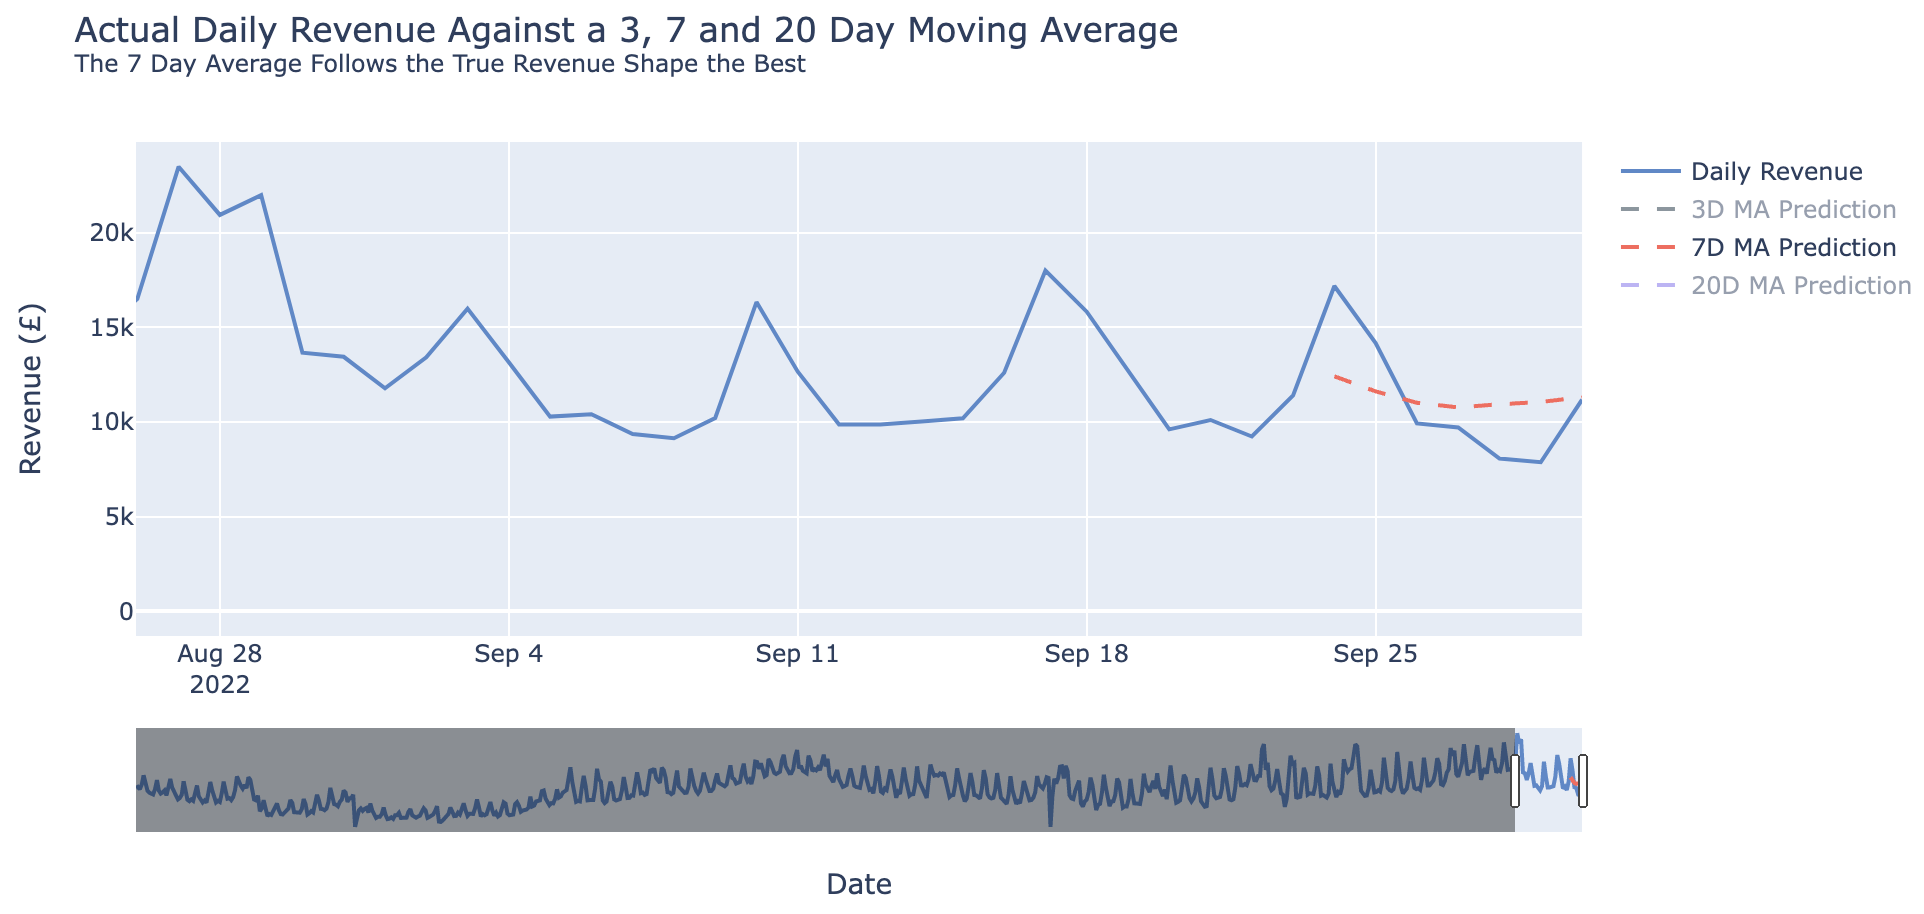

---

***The Baseline Weekly Model Forecast Using a 20 Week Moving Average***

| Forecast | R<sup>2</sup> | RMSE | MAE | MAPE |Moving Average Window|
| :- | :- | :- |:- | :- | :- |
| Weekly|-0.033|22,510 |17,072|24.8 %| 20|



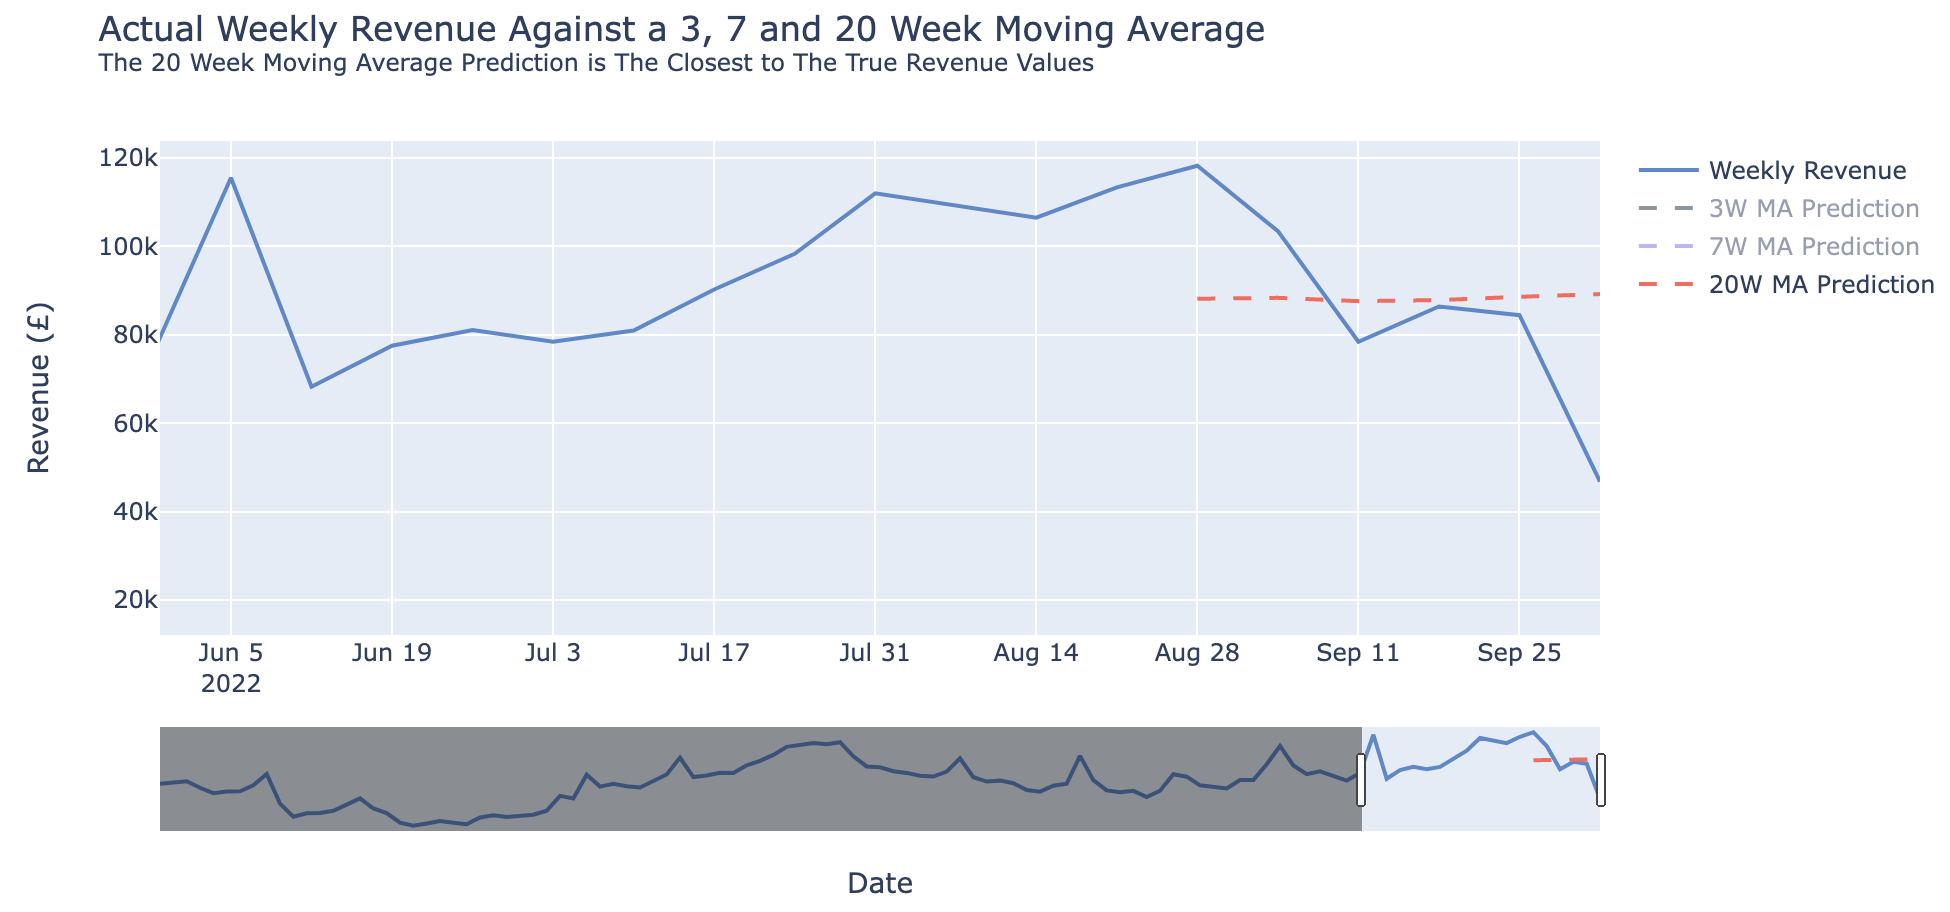

---

***The Baseline Monthly Model Forecast Using a 12 Month Moving Average***

| Forecast | R<sup>2</sup> | RMSE | MAE | MAPE |Moving Average Window|
| :- | :- | :- |:- | :- | :- |
| Monthly|-1.59|91,197|71,652|17.0 %| 12|


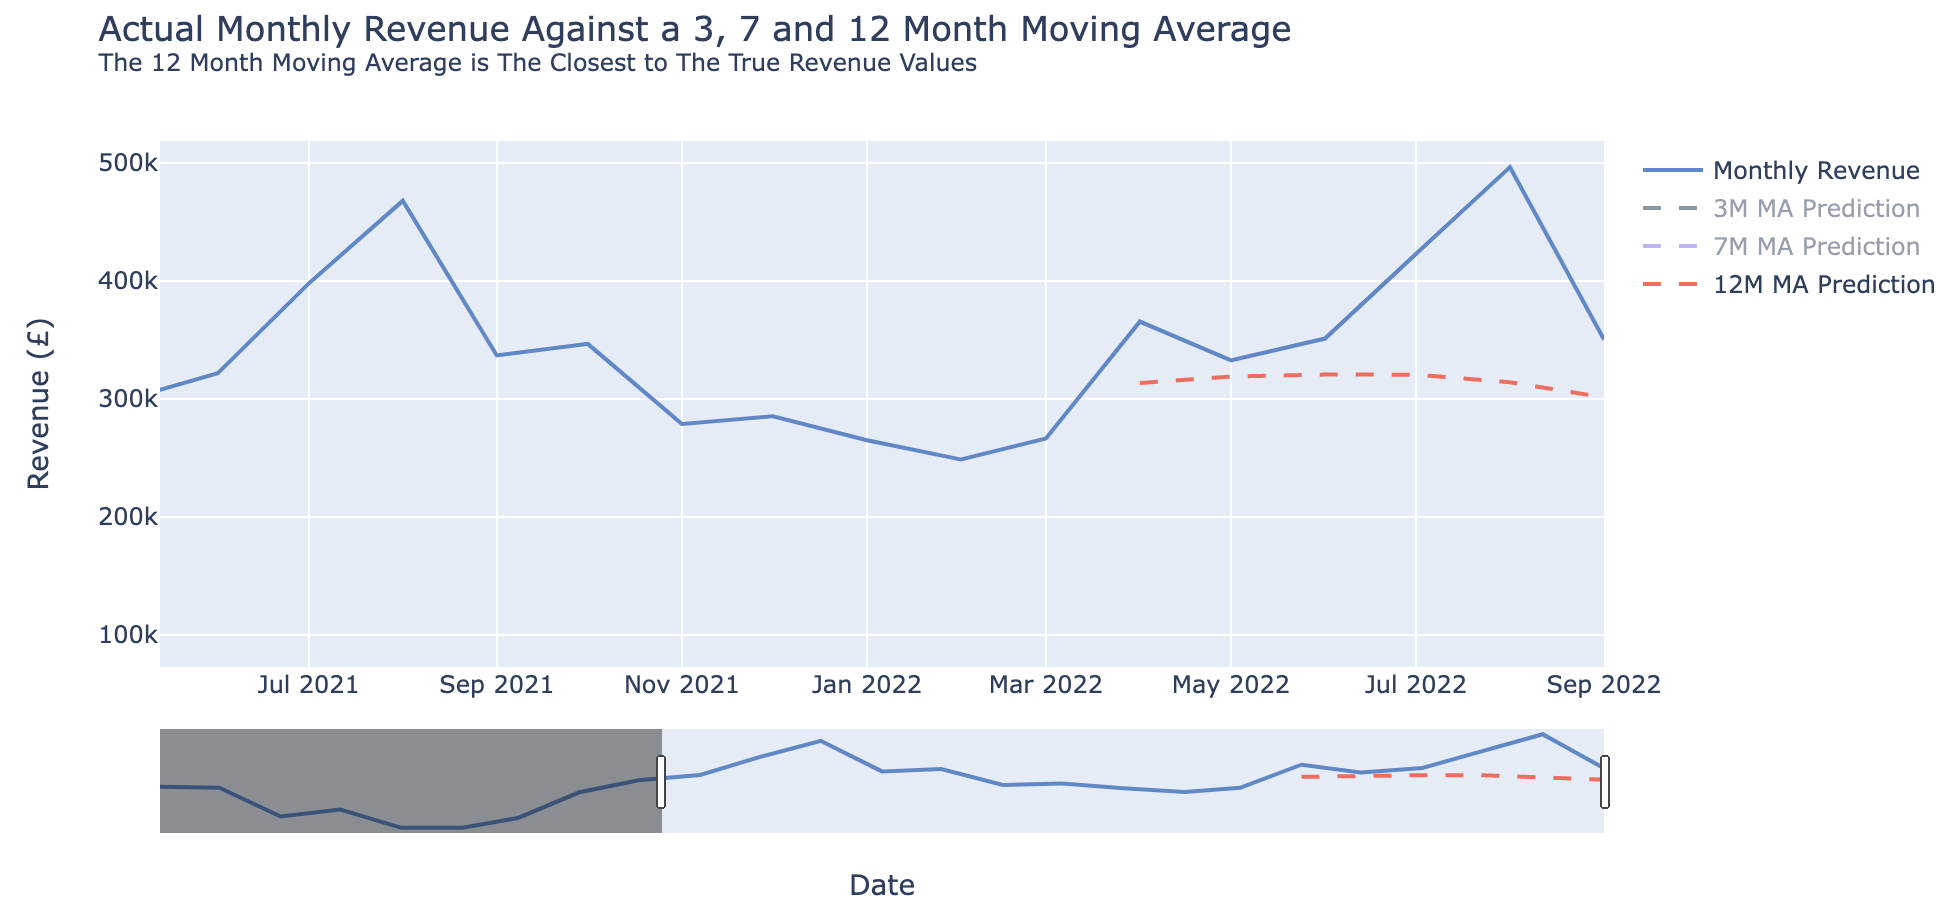

## Moving Average Forecast Observations 
For each of the baseline models they have incredibly high MAE and RMSE scores, which could indicate inaccurate models. However, as the MAE is returned on the same scale as the target it isn't the most reliable score.

The R2 score is how close the predicted values fit to the actual revenue, which are all very low or negative values, which means they don't fit that well. This is most likely due to the smoothing affect of the moving averages.

Both the daily and weekly MAPE score are over 20%, suggesting they are ok models. The reason they are not good is most likely due to the variance for each day and week is not captured well by the moving average.

Whereas, for the monthly MAPE score is less than 20%, suggesting a better model. This is most likely due to the fact the monthly revenue variance is far less than the daily and weekly, therefore the smoothing effect of the moving average does not make the predictions worse.

For full analysis please refer to [Model 1 - Moving Average](./6_Model_1_Moving_Average_Model.ipynb)

---

# Recreating the Datasets Required for the Moving Average Forecast

In [12]:
# Combined dataset of the original full and new data 
total_rev_daily = pd.concat([total_rev, oct_rev])
total_rev_daily.tail()

Total_Revenue  TAVG  Bank_Holiday  Closed_Xmas  School_Holiday  \
2022-10-27       12639.52  29.0             0            0               1   
2022-10-28       15491.77  27.0             0            0               1   
2022-10-29       18039.32  27.0             0            0               1   
2022-10-30       13195.83  28.0             0            0               1   
2022-10-31        9207.92  27.0             0            0               1   

            Weekday  Weekend  
2022-10-27        0        0  
2022-10-28        0        0  
2022-10-29        0        0  
2022-10-30        0        0  
2022-10-31        0        0

In [13]:
# To recreate the weekly dataset for re-evaluation 
total_rev_weekly = total_rev_daily.copy()
# the 'W' option specifies Weekly frequency
total_rev_weekly = total_rev_weekly.resample('W').sum().round(2)
# To remove the final row of data that is not a complete week
total_rev_weekly = total_rev_weekly[:-1]
# To validate it worked
total_rev_weekly.tail()

Total_Revenue   TAVG  Bank_Holiday  Closed_Xmas  School_Holiday  \
2022-10-02       75804.92  135.0             0            0               0   
2022-10-09       77423.15  162.0             0            0               0   
2022-10-16       73845.07  146.0             0            0               0   
2022-10-23       75097.48  176.0             0            0               1   
2022-10-30       97606.92  187.0             0            0               7   

            Weekday  Weekend  
2022-10-02        5        2  
2022-10-09        5        2  
2022-10-16        5        2  
2022-10-23        5        1  
2022-10-30        0        0

In [14]:
# To resample for the monthly dataset
total_rev_monthly = total_rev_daily.copy()
# Resampled to monthly
total_rev_monthly = total_rev_monthly.resample('MS').sum().round(2)
display(total_rev_monthly.tail())

Total_Revenue    TAVG  Bank_Holiday  Closed_Xmas  School_Holiday  \
2022-06-01      351262.48   837.0             2            0               3   
2022-07-01      422977.42  1029.0             0            0               9   
2022-08-01      496394.56  1064.0             2            0              29   
2022-09-01      350491.42   784.0             0            0               4   
2022-10-01      362204.28   745.0             0            0               9   

            Weekday  Weekend  
2022-06-01       19        6  
2022-07-01       16        6  
2022-08-01        0        0  
2022-09-01       20        6  
2022-10-01       15        7

In [15]:
# A copy is taken for audit trail purposes 
ma_daily = pd.DataFrame(total_rev_daily['Total_Revenue'].copy())
ma_weekly = pd.DataFrame(total_rev_weekly['Total_Revenue'].copy())
ma_monthly = pd.DataFrame(total_rev_monthly['Total_Revenue'].copy())

In [16]:
# To add the moving average columns
bakery.rev_moving_average(ma_daily, 7, '7D_MA')
ma_daily_test = ma_daily.loc[:'2022-10-07'].copy()
bakery.rev_moving_average(ma_weekly, 20, '20W_MA') 
bakery.rev_moving_average(ma_monthly, 12, '12M_MA')

In [17]:
# Validate it worked 
ma_weekly.tail()

Total_Revenue    20W_MA
2022-10-02       75804.92  90752.88
2022-10-09       77423.15  90962.82
2022-10-16       73845.07  91518.56
2022-10-23       75097.48  91485.91
2022-10-30       97606.92  89463.00

---

# Model 2 - Linear Regression Summary

**Overview of model:**
Linear regression works by determining the relationship between the input (independent variables) and the continuous dependent variable (`Total_Revenue`). By determining which independent variables have the greatest impact on the revenue, they can be used as predictors to forecast future revenue.

**Why selected:** This model is easy to train and implement and thought to provide relatively good forecasts based on statistical features created from the historical dataset. 

**Pros:**
- Easy to build, interpret and efficient to train 
- Can add multiple external dataset and easily use statistical features from the historic dataset 

**Cons:**
- The assumption of linearity between dependent and independent variables
- Is prone to over and underfitting data, which can be reduced by regualization 

**Assumptions:**
In order for a successful linear regression model there are a few assumptions about the data that must be made, these are:

- There is a linear relationship between the dependent and independent variables
- The independent variables are independent of each other (no multicollinearity)
- Residuals are normally distributed
- Homoscedasticity: Variance of error terms are similar across the values of the independent variables

If these are not met, the chance of of predicting a false positive increases, leading to false conclusions being made. Therefore, the independent variabels were assessed for multicollinearity using correlation heat map and VIF and the residuals of the models examined, which showed they were normally distributed and homoscedastic. 

**Modelling Overview:** 
- A total of 24 iterations were made for the daily, weekly and monthly forecasts. The best model for each forecast are summarised below along with their MAPE scores and independent variables, which all had p-values lower than the threshold of 0.05 and graphs demonstratinig the forecasts. 

# Results of the Best Daily, Weekly and Monthly Linear Regression Forecast

---
***The Daily Linear Regression Model Forecast***



|Forecast| Model | MAPE | Independent Variables | 
|:--| :- | :- | :- |
|Daily|7| 7.7 %|TAVG, Bank_Holiday, Closed_Xmas, School_Holiday, Weekend, 3D_MA_lag, 3D_Var_lag | 




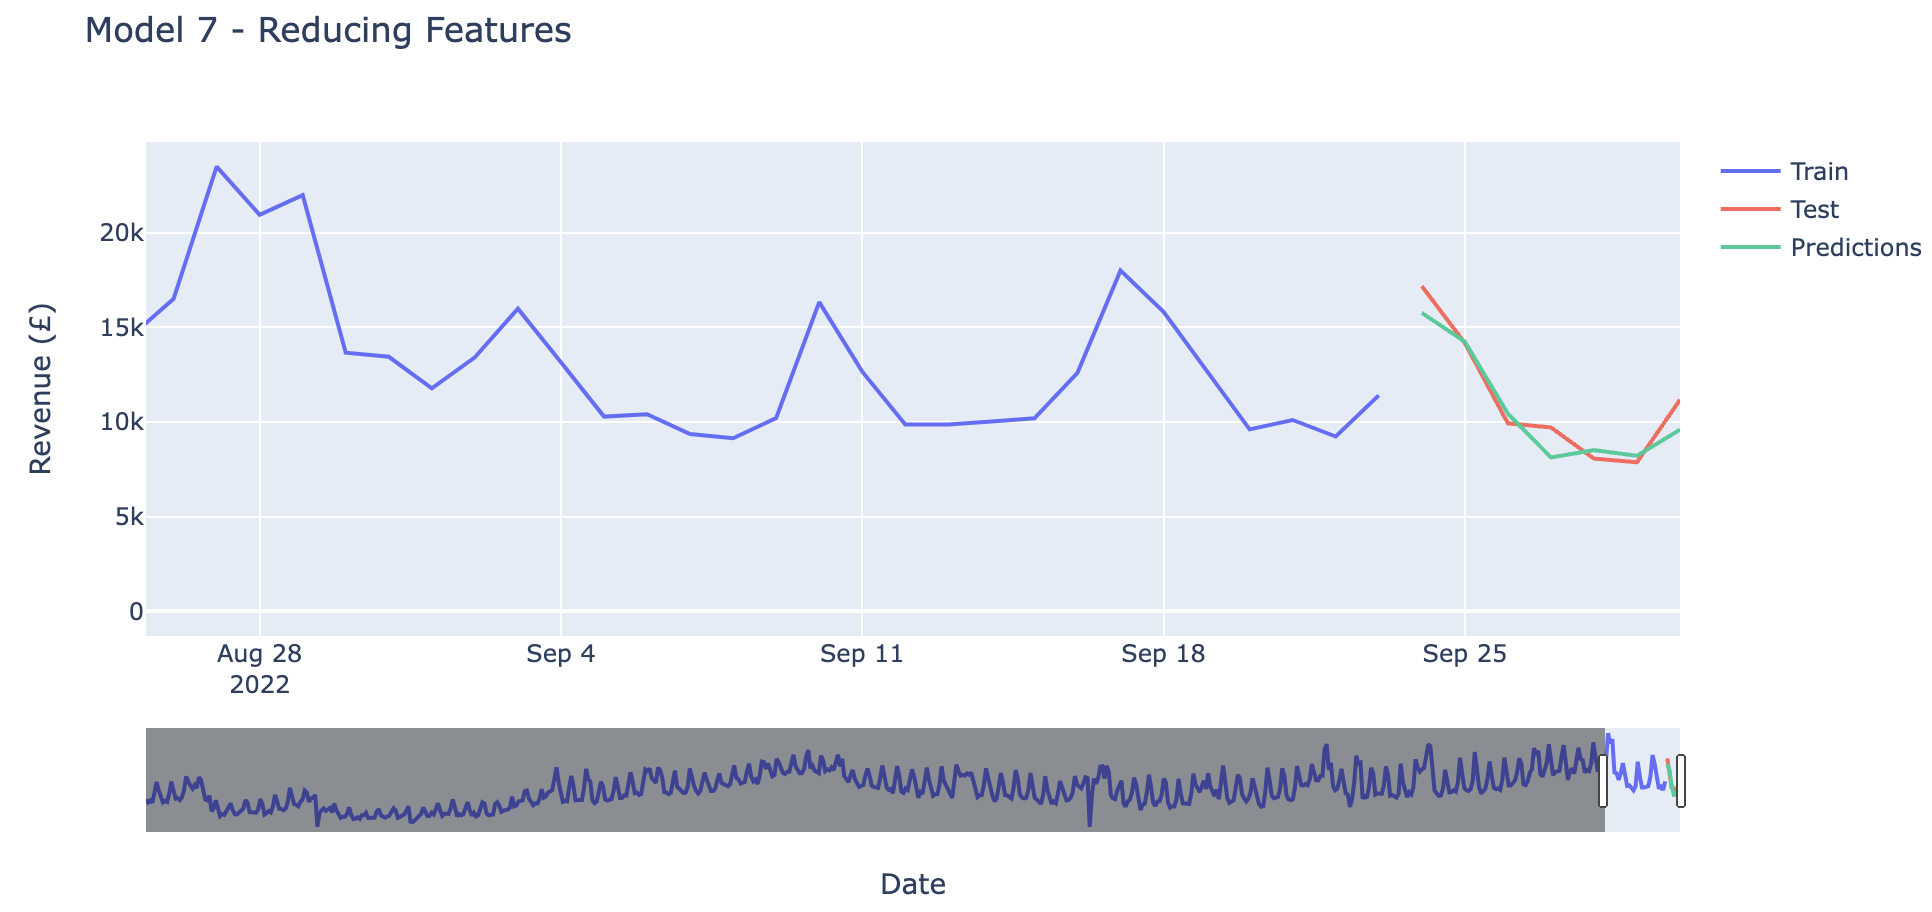

---

---
***The Weekly Linear Regression Model Forecast***



|Forecast| Model | MAPE | Independent Variables | 
|:--| :- | :- | :- |
|Weekly|6| 9.9 %|7W_MA_lag, Weekday|




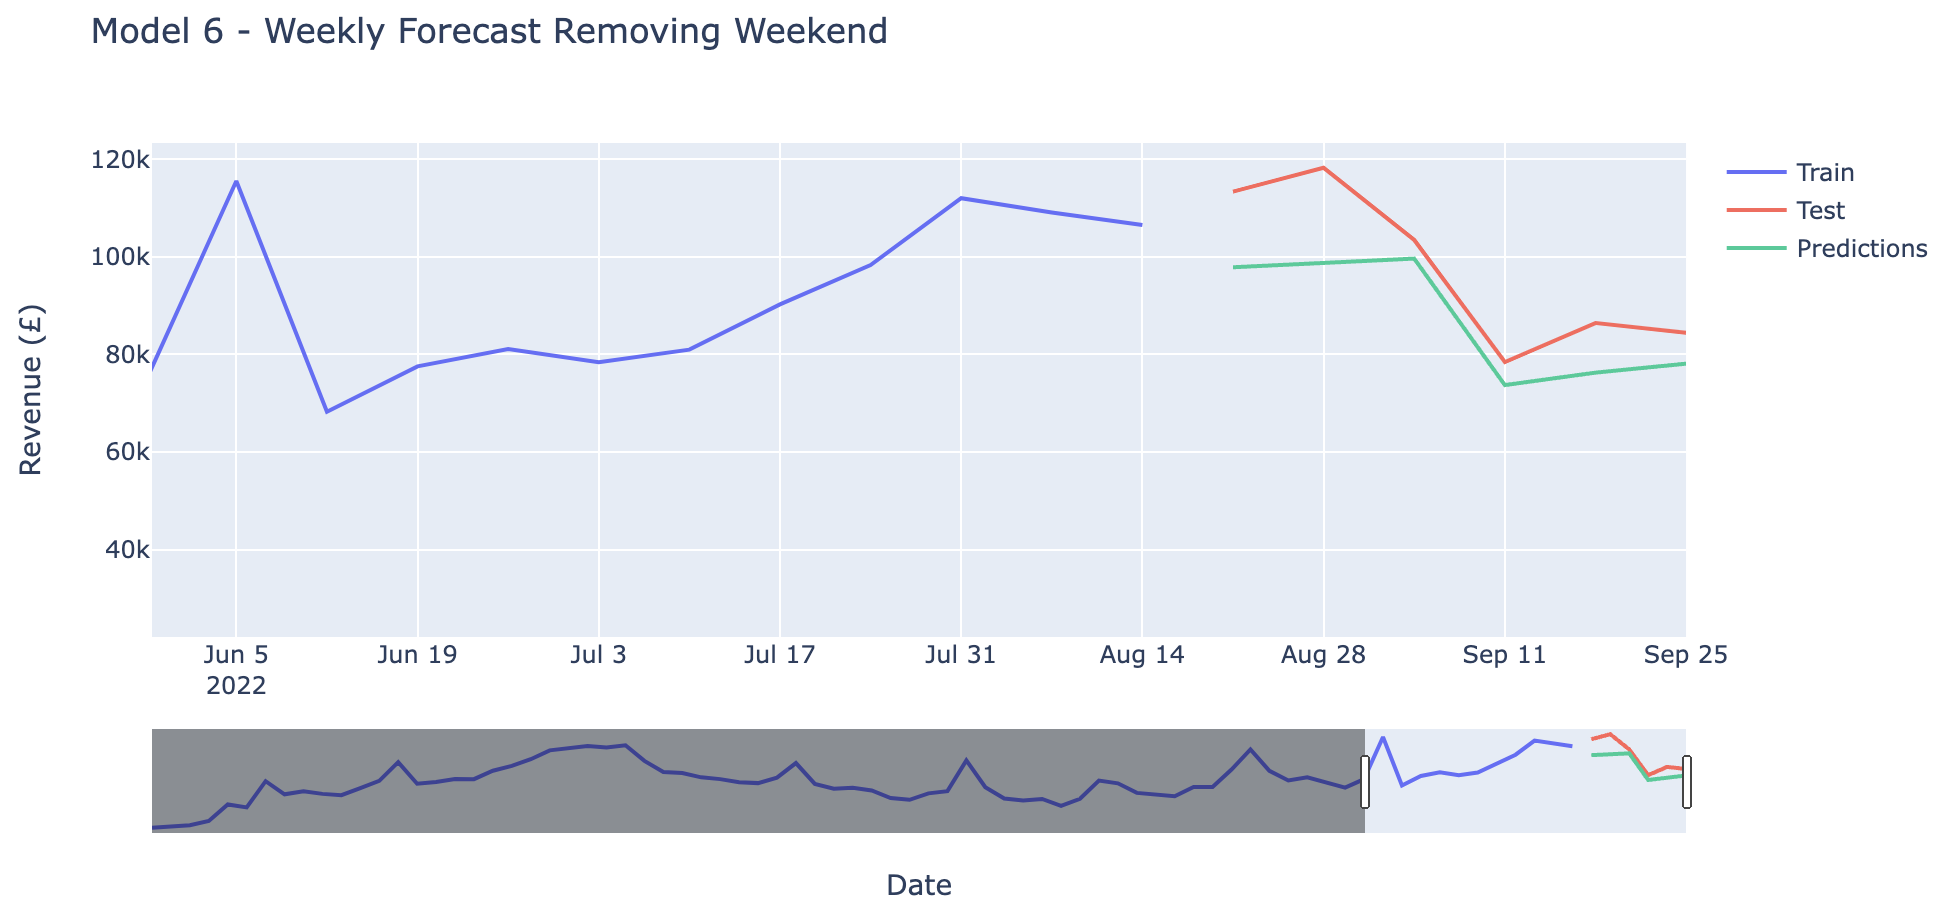

---

***The Monthly Linear Regression Model Forecast***



|Forecast| Model | MAPE | Independent Variables | 
|:--| :- | :- | :- |
|Monthly|9| 13.3 %|School_Holiday, Weekend, 3M_Var_lag |




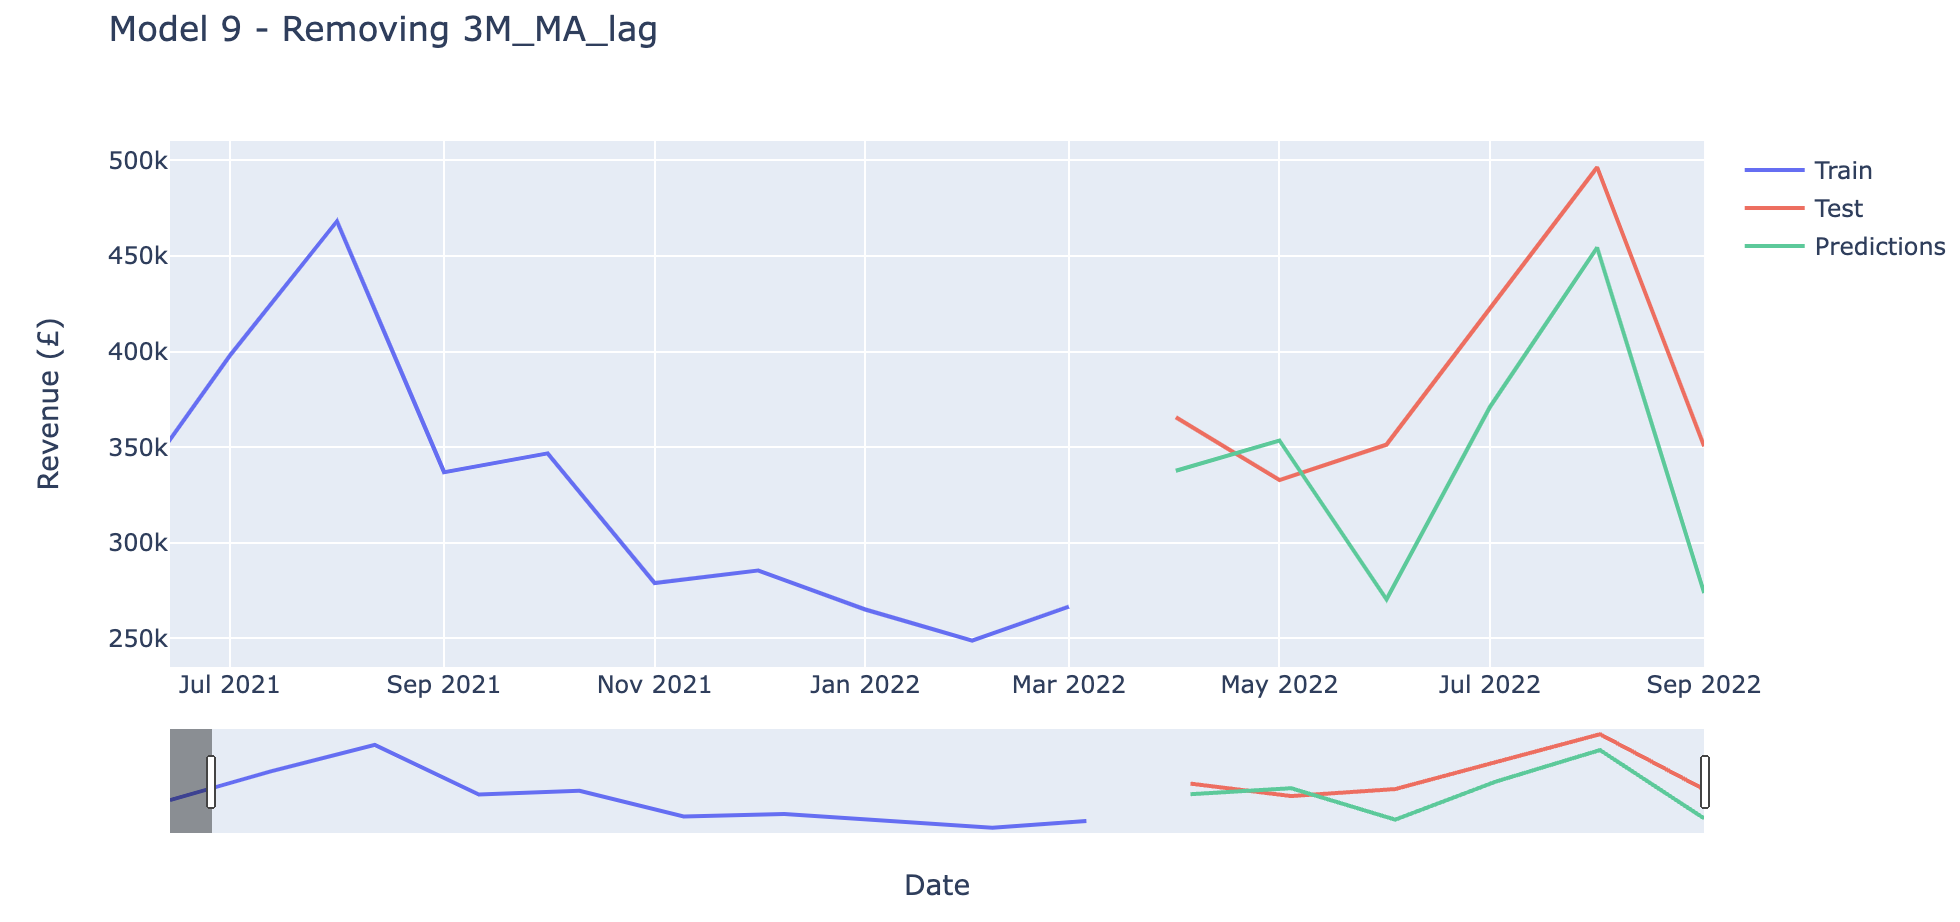

---

## Further Improvements for Linear Regression 
Further improvements that could be made to the model is:

- Applying Ridge and Lasso penalisation through a grid search to find the optimal hyperparameters for the model
- Exploring different moving average window lengths to see if there is an optimum length (for example smaller window lengths will allow more data points to be included in the train dataset)
- Getting more data to impove fitting of the models, ideally at least 4 years worth

For full analysis please refer to [Model 2 - Linear Regression](#./7_Model_2_Linear_Regression.ipynb)

---

# Recreating the Datasets Required for the Linear Regression Forecast
For each forecast different independent variables were used, which need to be recreated so that the models can be re-assessed on the new data. 
### To Recreate the Daily Dataset Required for the Linear Regression

In [18]:
daily_lr = total_rev_daily.copy()
# The moving average is calculated using the rev_moving_average function 
bakery.rev_moving_average(daily_lr, 3, '3D_MA')

# To move the MA data over by 7 days
for row in daily_lr.index:
    try:
        daily_lr.loc[row,'3D_MA_lag'] = daily_lr.loc[row-DateOffset(days=7),'3D_MA']
    except:
        continue
        
# To calculate the variance
for row in daily_lr.index:
    daily_lr.loc[row,'3D_Var'] = daily_lr.loc[row,'3D_MA'] - daily_lr.loc[row,'Total_Revenue']
    
# To move the variance data by 7 days to ensure no actual data leaks into the test dataset
for row in daily_lr.index:
    try:
        daily_lr.loc[row,'3D_Var_lag'] = daily_lr.loc[row-DateOffset(days=7),'3D_Var']
    except:
        continue

In [19]:
# To validate it worked
daily_lr.head()

Total_Revenue  TAVG  Bank_Holiday  Closed_Xmas  School_Holiday  \
2020-09-01        9780.76  24.0             0            0               0   
2020-09-02       10037.55  27.0             0            0               0   
2020-09-03        9419.30  31.0             0            0               0   
2020-09-04       10606.15  27.0             0            0               0   
2020-09-05       12922.00  23.0             0            0               0   

            Weekday  Weekend     3D_MA  3D_MA_lag   3D_Var  3D_Var_lag  
2020-09-01        1        0       NaN        NaN      NaN         NaN  
2020-09-02        1        0       NaN        NaN      NaN         NaN  
2020-09-03        1        0       NaN        NaN      NaN         NaN  
2020-09-04        1        0   9745.87        NaN  -860.28         NaN  
2020-09-05        0        1  10021.00        NaN -2901.00         NaN

In [20]:
# The correct columns are copied for the model to run 
lr_daily_data = daily_lr[['Total_Revenue', 'TAVG', 'Bank_Holiday', 'Closed_Xmas', 'School_Holiday', 
                            'Weekend', '3D_MA_lag', '3D_Var_lag']].copy()

# Splitting the train and test data for daily forecast 
lr_test_daily = lr_daily_data.loc[lr_daily_data.index > '2022-09-30'].copy()
lr_test_daily = lr_test_daily.loc[lr_test_daily.index<='2022-10-07']
lr_X_test_daily = lr_test_daily.drop(columns=['Total_Revenue'])
lr_X_test_con_daily = sm.add_constant(lr_X_test_daily, has_constant='add')
lr_y_daily = lr_test_daily['Total_Revenue']

### To Recreate the Weekly Dataset Required

In [21]:
lr_weekly_full = total_rev_weekly.copy()
# To add the moving average lag variable 
# The moving average is calculated using the rev_moving_average function 
bakery.rev_moving_average(lr_weekly_full, 7, '7W_MA')

# To move the MA data over
for row in lr_weekly_full.index:
    try:
        # offset by 5 weeks as that is the now unknown predicted data 
        lr_weekly_full.loc[row,'7W_MA_lag'] = lr_weekly_full.loc[row-DateOffset(weeks=5),'7W_MA']
    except:
        continue

In [22]:
# The correct columns are copied for the model to run 
lr_weekly_data = lr_weekly_full[['Total_Revenue', 'Weekday', '7W_MA_lag']].copy()

# Splitting the test data for weekly forecast for the correct dates
lr_test_weekly = lr_weekly_data.loc[lr_weekly_data.index >= '2022-10-02'].copy()
lr_X_test_weekly = lr_test_weekly.drop(columns=['Total_Revenue'])
lr_X_test_con_weekly = sm.add_constant(lr_X_test_weekly, has_constant='add')
lr_y_weekly = lr_test_weekly['Total_Revenue']

### To Recreate the Monthly Dataset Required

In [23]:
lr_monthly_data = total_rev_monthly.copy()
# The moving average is calculated using the rev_moving_average function 
bakery.rev_moving_average(lr_monthly_data, 3, '3M_MA')
# To move the MA data over
for row in lr_monthly_data.index:
    try:
        lr_monthly_data.loc[row,'3M_MA_lag'] = lr_monthly_data.loc[row-DateOffset(months=2),'3M_MA']
    except:
        continue
        
# To calculate the variance between the moving average and the actual revenue 
for row in lr_monthly_data.index:
    lr_monthly_data.loc[row,'3M_Var'] = lr_monthly_data.loc[row,'3M_MA'] - lr_monthly_data.loc[row,'Total_Revenue']

    # To move the MA data over
for row in lr_monthly_data.index:
    try:
        lr_monthly_data.loc[row,'3M_Var_lag'] = lr_monthly_data.loc[row-DateOffset(months=2),'3M_Var']
    except:
        continue

In [24]:
lr_monthly_data = lr_monthly_data[['Total_Revenue', 'School_Holiday', 'Weekend', '3M_Var_lag']]
# Splitting test data required for monthly linear regression 
lr_test_monthly = lr_monthly_data.loc[lr_monthly_data.index >= '2022-09-01'].copy()
lr_X_test_monthly = lr_test_monthly.drop(columns=['Total_Revenue'])
lr_X_test_con_monthly = sm.add_constant(lr_X_test_monthly, has_constant='add')
lr_y_monthly = lr_test_monthly['Total_Revenue']

---

# Model 3 - SARIMAX Summary

**Overview of model:** Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors (SARIMAX) is an updated version of the ARIMA model, which is a statistical analysis model that uses time series data to predict future trends. It includes seasonal effects and eXogenous factors with the autoregressive and moving average component in the model.

**Why selected:** It is known in industry to be one of the best forecasting methods. In addition to this, during the build and decomposition of the data, it allows for a greater understanding of the data being analysed, as it splits it up into the trend, seasonal and residual components. 

**Pros:**
- Only requires the prior data of a time series to generalize the forecast, and the least data processing compared to all the other models built, which require transformations and column name changes 
- Performs well on short term forecasts, which is required for the daily forecast of a 7 days ahead 
- Models non-stationary time series, which the bakery revenue data is 

**Cons:**
- There is quite a bit of subjectivity involved in determining (p,d,q) order of the model
- Computationally expensive 
- Less explainable than the other models that have been evaluated 

**Assumptions:**
- The data is stationary
- Residuals are normally distributed and show no significant correlation

During the modelling, the data gets differenced by the d parameter making it stationary, which was validated through Dickey-Fuller Tests. Once the best model was identified the residuals of each model were explored and were found to be mostly normally distributed an showed no correlation.

**Modelling Overview:** 

- A total of 21 iterations were made for the daily, weekly and monthly forecasts, using a combination of decomposing and selecting hyperparameters and applying a grid search. 
- The best model for each are summarised in the table below with their MAPE scores and additional information about the hyperparameters and independent variables used. 


# Results of the Best Daily, Weekly and Monthly SARIMAX Forecast

---
***The Best Daily SARIMAX Model Forecast***



|Forecast| Model | MAPE | Independent Variables | Hyperparameters|
|:--| :- | :- | :- |:-|
|Daily|7| 5.9 %|TAVG, Bank_Holiday, Closed_Xmas, Weekend | p=1, d=2, q=1 | 


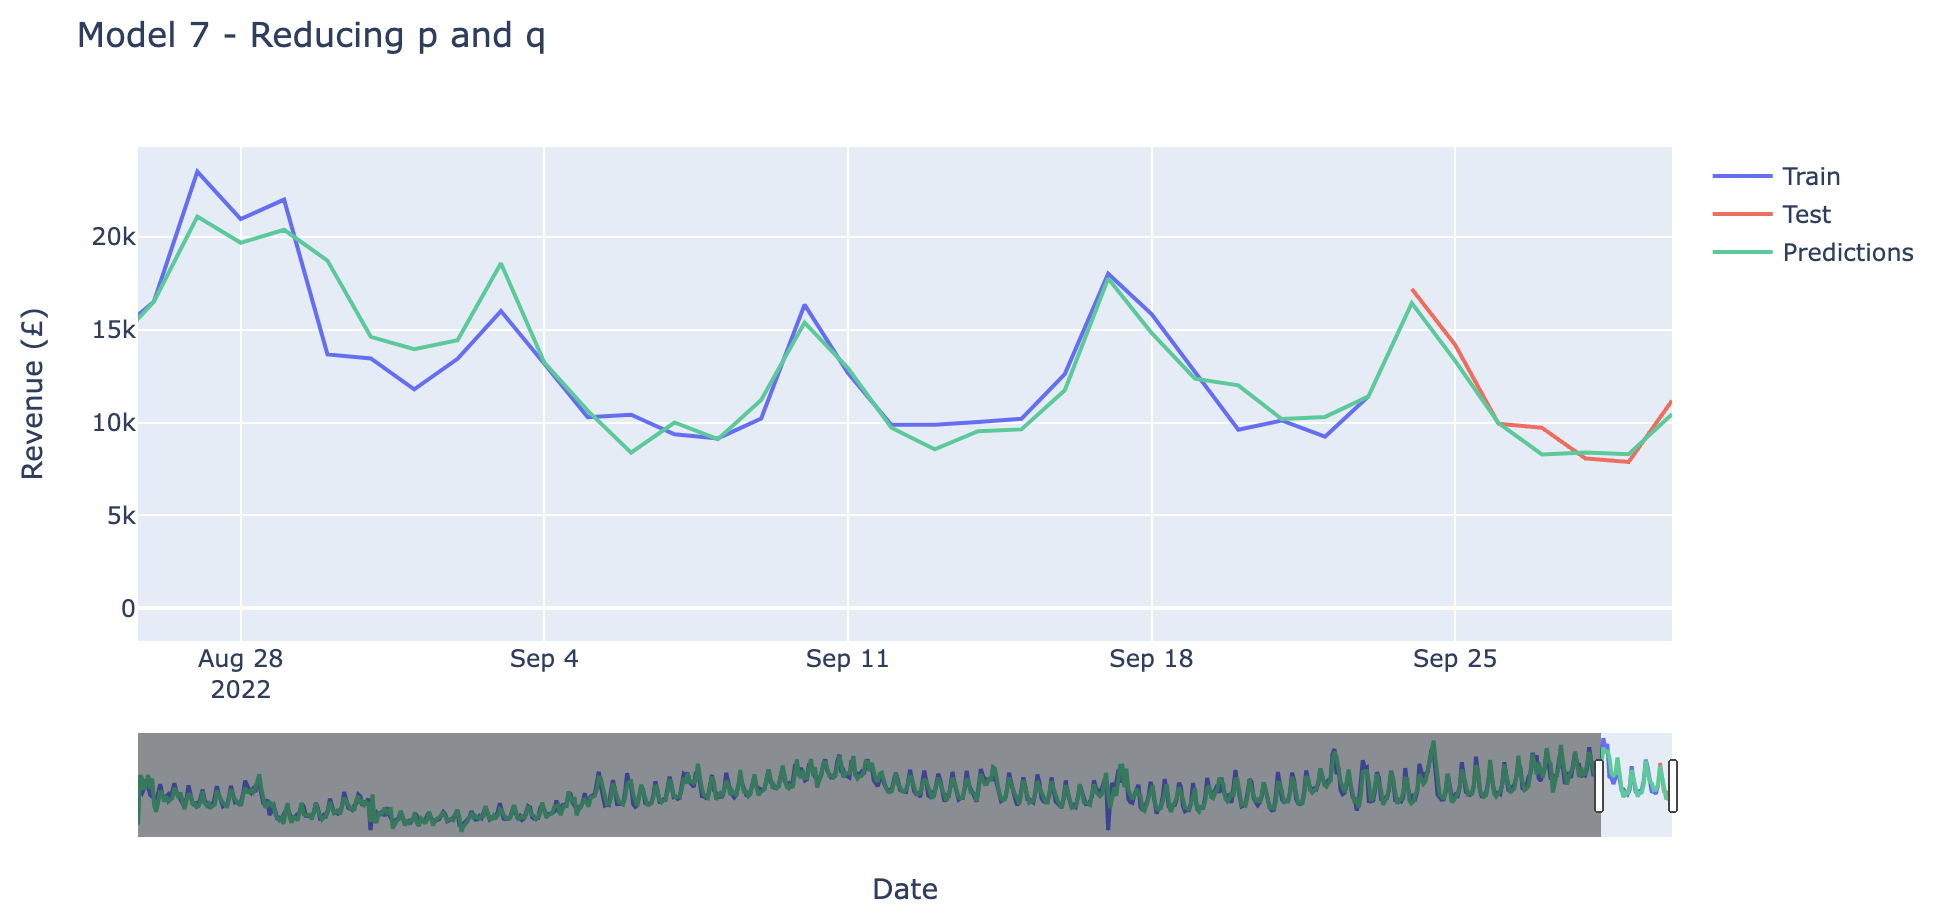

---

***The Best Weekly SARIMAX Model Forecast***



|Forecast| Model | MAPE | Independent Variables | Hyperparameters|
|:--| :- | :- | :- |:-|
|Weekly|7| 8.2 %| Weekday, Bank_Holiday | p=0, d=2, q=1 | 


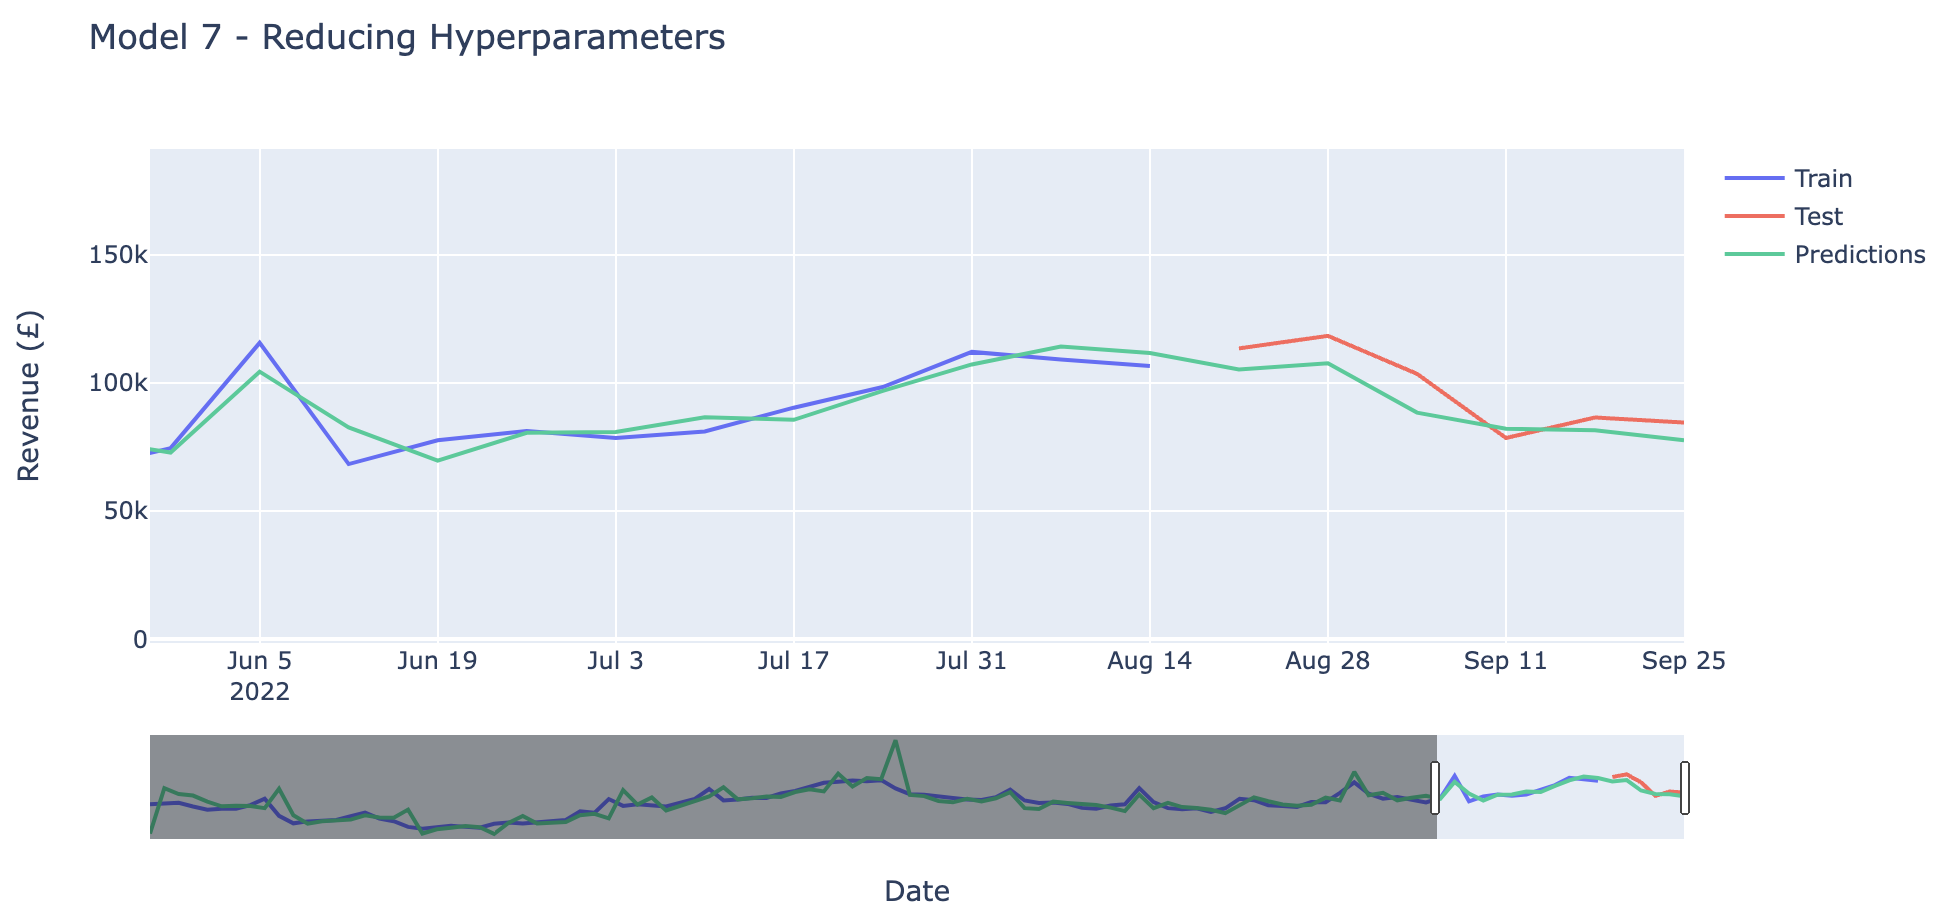

---

***The Best Monthly SARIMAX Model Forecast***


|Forecast| Model | MAPE | Independent Variables | Hyperparameters|
|:--| :- | :- | :- |:-|
|Monthly|5| 7.1 %| Bank_Holiday, Closed_Xmas, School_Holiday, Weekday, Weekend | p=3, d=2, q=1 |



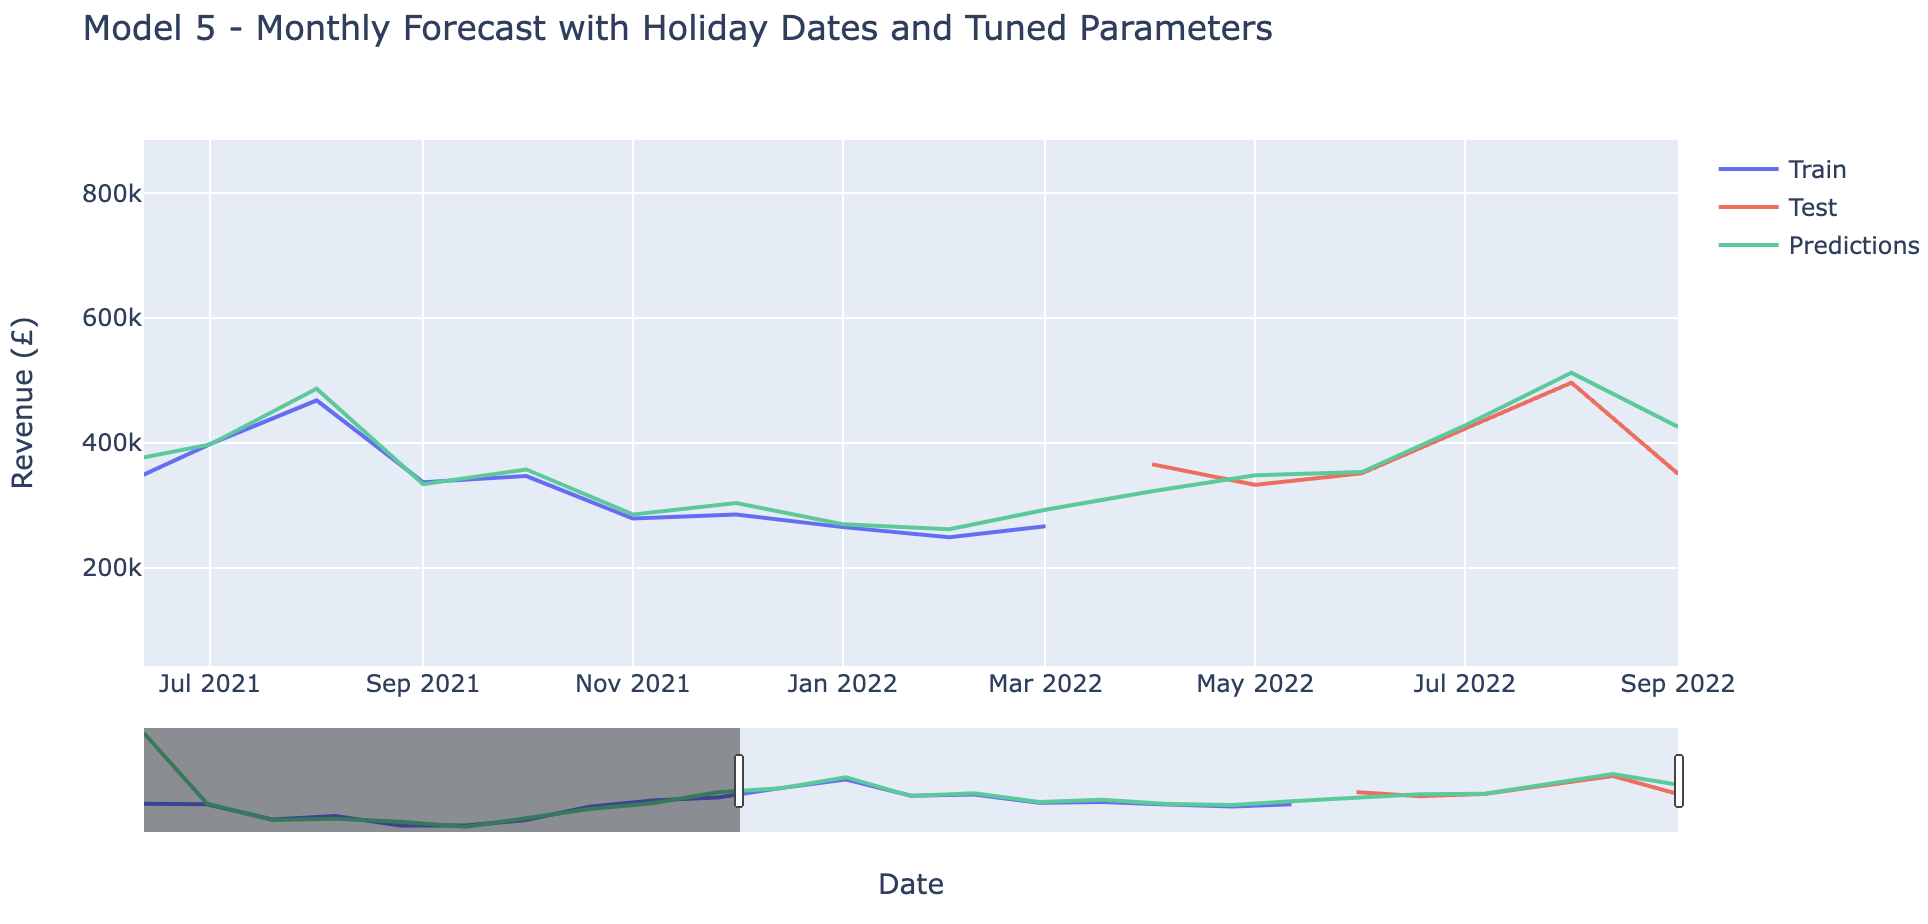

---

## Comments on the SARIMAX Models: 
- The daily and monthly SARIMAX models produced forecasts that follow the true revenue values relatively accurately.
- Looking at the weekly forecast, despite achieving the lowest MAPE score out of all the models built, looking at the graph it appears to predict revenue sporatically, and not quite capturing the true trend. In addition to this, this plots of the residuals showed some variance and heteroscedasticity. This suggests that the model is less accurate than the other models and desired. This is thought to be due primarly to the lack of data the model was fitted on compared to the daily model. 


## Further improvements could be: 
- Collecting and re-running the models with more data, in particular the weekly and monthly datasets
- Run in depth cross validation, not just one fold. This was not performed as it is already a computationally expensive model to run and the weekly and monthly data was deemed to be a too small sample size to successfully work 

For full analysis please refer to [Model 3 - SARIMAX](8_Model_3_SARIMAX.ipynb)

---

# Recreating the Datasets Required for the SARIMAX Forecast
Less preprocessing is required for the SARIMAX model, only selecting the correct independent variables for each forecast. 

**To recreate the daily dataset**

In [25]:
# Setting up daily dataset for SARIMAX
sa_daily = total_rev_daily[['Total_Revenue', 'TAVG', 'Bank_Holiday', 'Closed_Xmas', 'Weekend']].copy()

# Splitting the test data
sa_test_daily = sa_daily.loc[sa_daily.index > '2022-09-30'].copy()
sa_test_daily = sa_test_daily.loc[sa_test_daily.index<='2022-10-07']
test_ex_d = sa_daily.loc[sa_daily.index > '2022-09-23'].copy()
test_ex_d = test_ex_d[test_ex_d.index <= '2022-10-07']
test_ex_d = test_ex_d[['TAVG', 'Bank_Holiday', 'Closed_Xmas', 'Weekend']]

**To recreate the weekly dataset**

In [26]:
# Setting up weekly dataset for SARIMAX
sa_weekly = total_rev_weekly[['Total_Revenue', 'Weekday', 'Bank_Holiday']].copy()

# Splitting the train and test data for weekly forecast 
sa_train_weekly = sa_weekly.loc[sa_weekly.index <= '2022-10-02'].copy()
sa_test_weekly = sa_weekly.loc[sa_weekly.index > '2022-10-02'].copy()
# For the model to work, all the exogenous data between the dates the model was fitted on and the forecast date 
# needs to be included 
test_ex_w = sa_weekly.loc[sa_weekly.index > '2022-08-14'].copy()
test_ex_w = test_ex_w[['Weekday', 'Bank_Holiday']]

**To recreate the monthly dataset**

In [27]:
# Setting up monthly dataset for SARIMAX
sa_monthly = total_rev_monthly[['Total_Revenue', 'School_Holiday', 'Bank_Holiday', 'Closed_Xmas',
                                'Weekend', 'Weekday']].copy()

# Splitting the train and test data for monthly forecast graphs
sa_train_monthly = sa_monthly.loc[sa_monthly.index <='2022-09-01'].dropna().copy()
sa_test_monthly = sa_monthly.loc[sa_monthly.index >= '2022-09-01'].copy()
# Need to include exogenous data that was missing from the fitted model 
test_ex_m = sa_monthly.loc[sa_monthly.index > '2022-03-01'].copy()
test_ex_m = test_ex_m[['School_Holiday', 'Bank_Holiday', 'Closed_Xmas',
                                'Weekend', 'Weekday']]

---

# Model 4 - Facebook Prophet Summary

**Overview of model:** Prophet procedure is an additive regression model with four main components <sup>[1]</sup>: 
- A piecewise linear or logistic growth curve trend. Prophet automatically detects changes in trends by selecting changepoints from the data 
- A yearly seasonal component modeled using Fourier series
- A weekly seasonal component using dummy variables
- A user-provided list of important holidays, such as the school holidays 

**Why selected:** Facebook Prophet is known in industry for being a suitable model for forecasting when 'special dates' or 'holidays' are an important factor in predicting the forecast, which from the EDA and speaking with the bakery owner is the case. 

**Pros:** 
- Daily or weekly observations with at least a few months (preferably a year) of history
- Strong multiple 'human-scale' seasonalities: day of week and time of year, which the bakery revenue data demonostrates 
- Historical trend changes, for instance due to product launches or logging changes, or for the case of the bakery post pandemic life 
- Trends that are non-linear growth curves, where a trend hits a natural limit or saturates, which could be important in future forecasting when the bakery revenue saturates 

**Cons:**
- Requires data to be specified in a specific format, increasing processing time 
- Performance varies by data set, as shown in the daily versus monthly forecast 
- Computationally expensive, takes longer to train than all the other models that have been built 

**Modelling Overview:** 

- A total of 13 iterations were made for the daily, weekly and monthly forecasts. The best model for each are summarised in the table below with their MAPE scores and additional information about the hyperparameters and exogenous datasets used. 
- The weekly forecast performed particularly well with holidays added and was good at accounting for the change in revenue due to the summer holidays.
- The monthly model was very poor and produced very inaccurate results, worse than the simple baseline moving average. This is most likely due to the severe lack of data points for the Facebook Prophet model to successfully determine the trend. 

# Results of the Best Daily, Weekly and Monthly Facebook Prophet Forecast

---
***The Best Daily Facebook Prophet Model Forecast***



|Forecast| Model | MAPE | Comments |
|:--| :- | :- | :--|
|Daily|5| 9.5 %| Added TAVG |


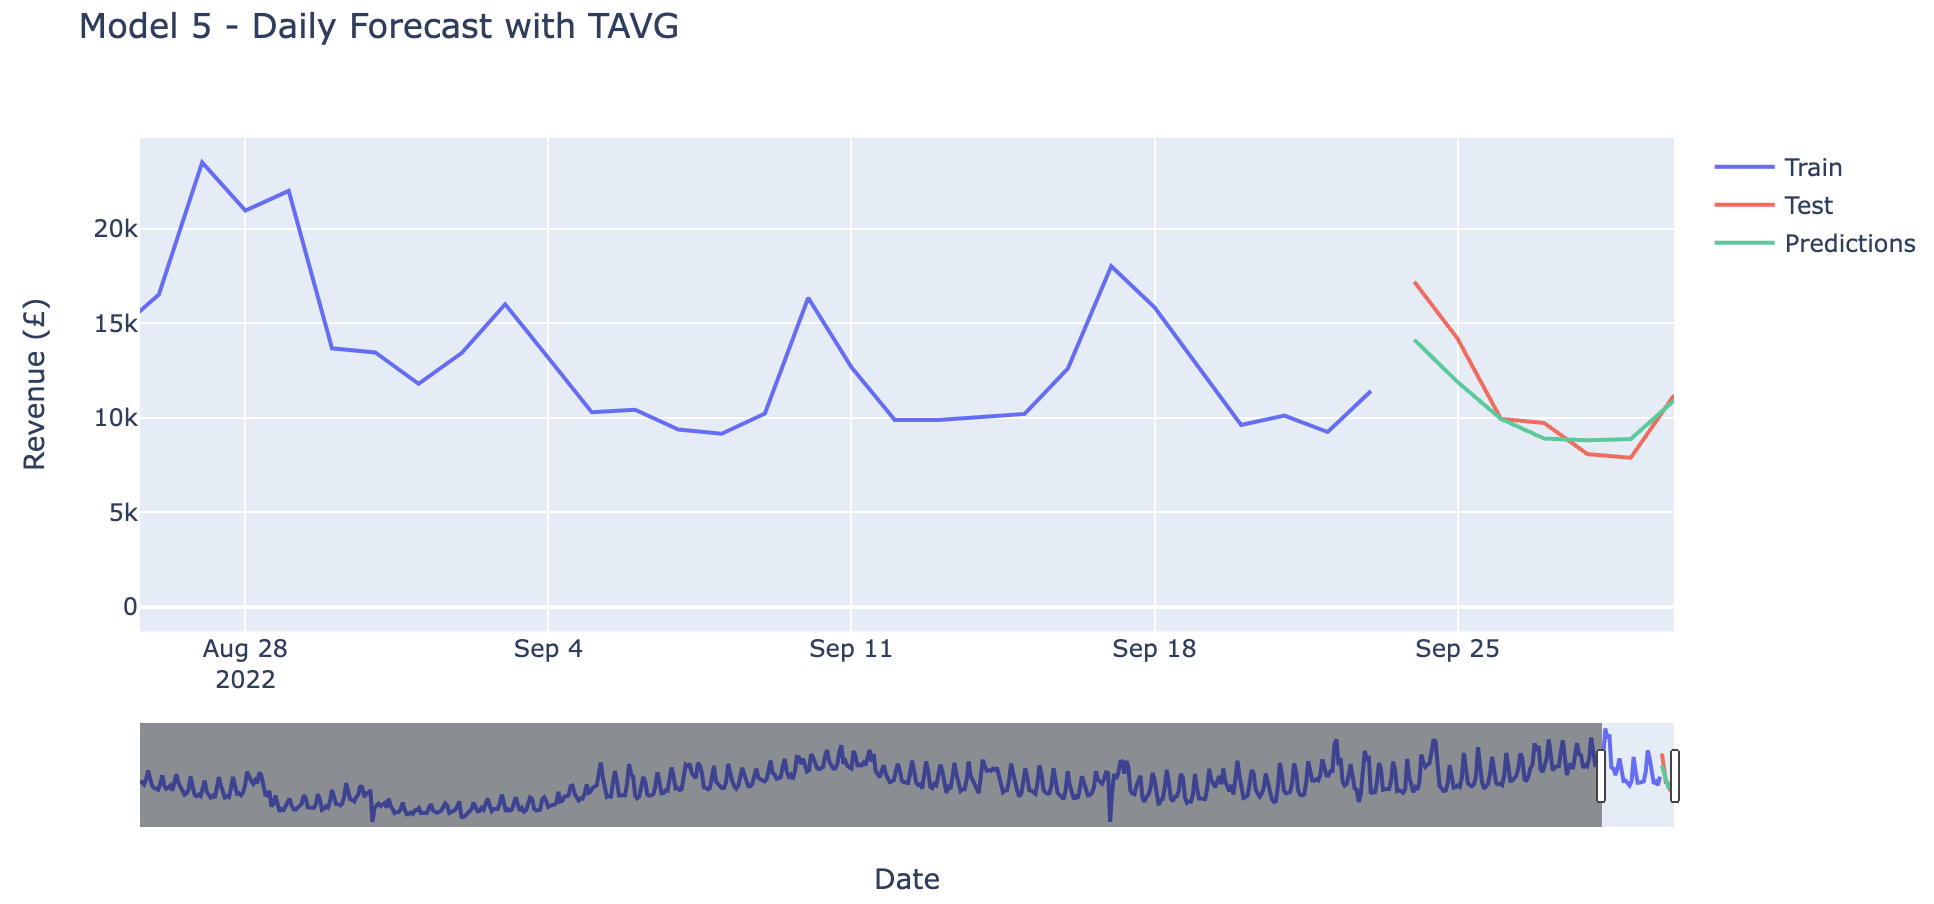

---

***The Best Weekly Facebook Prophet Model Forecast***



|Forecast| Model | MAPE | Comments |
|:--| :- | :- | :--|
|Weekly|4| 8.5 %| Holidays and tuned hyperparameters| 


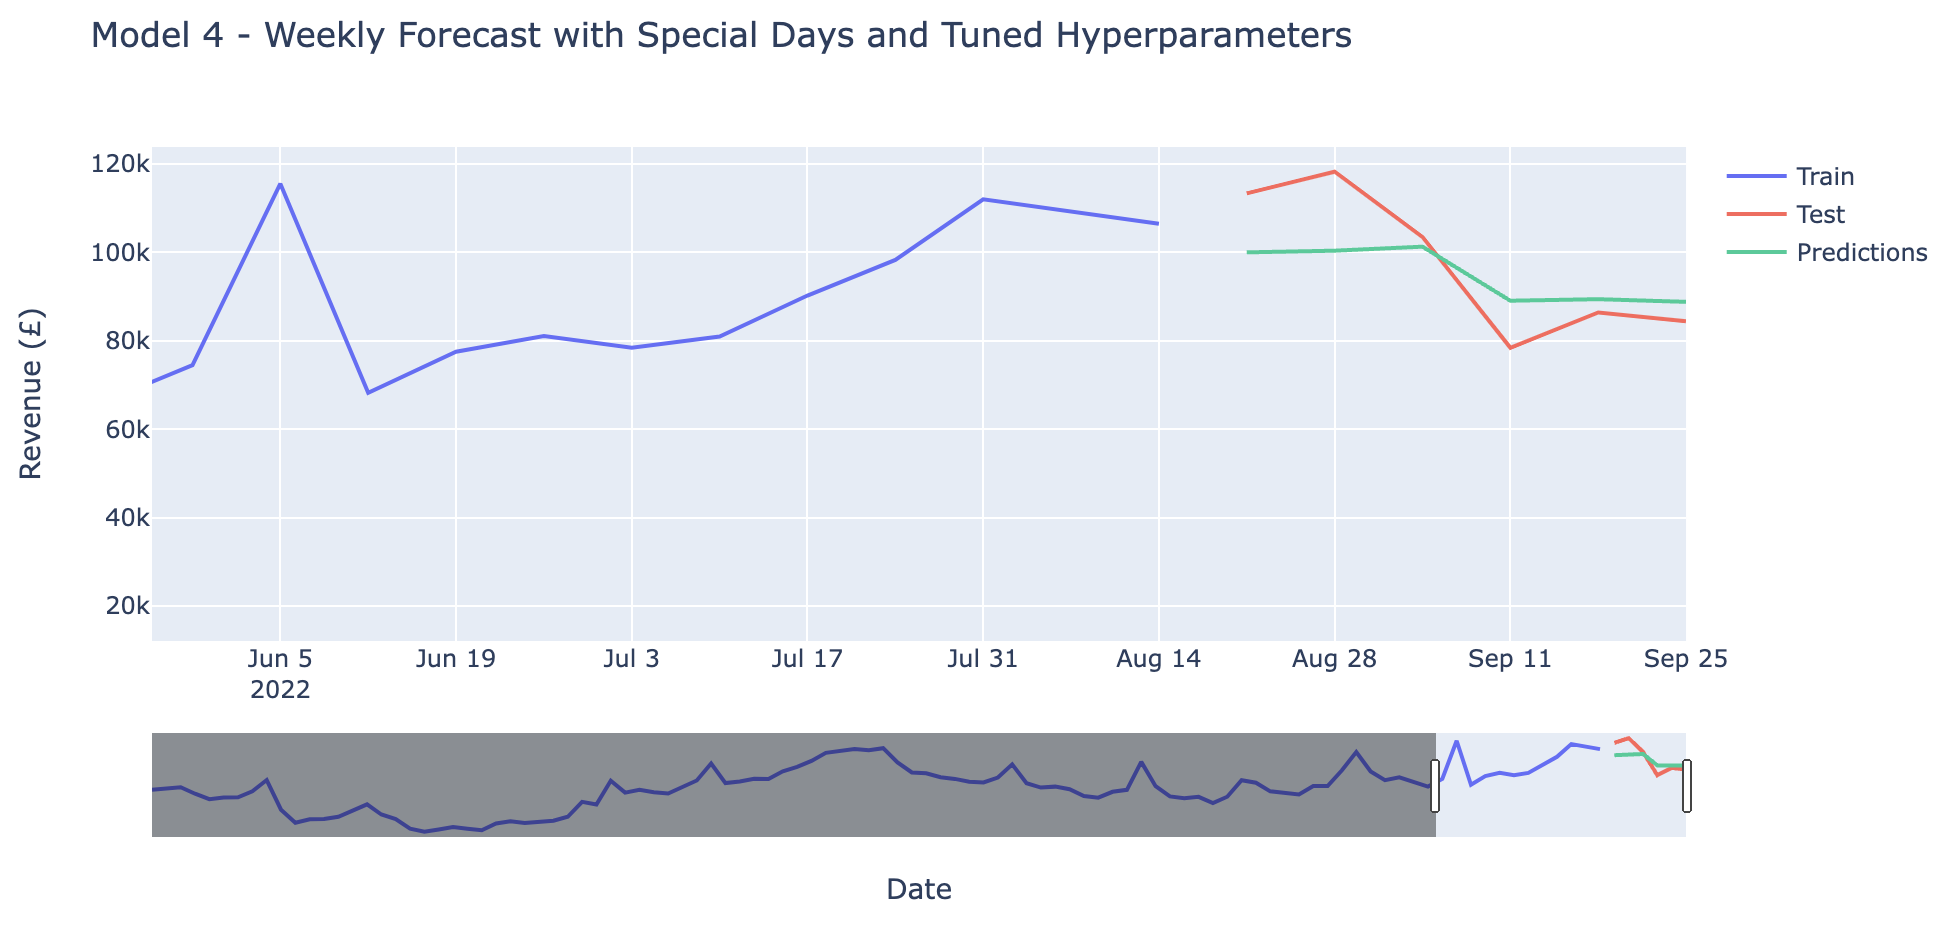

---

***The Best Monthly Facebook Prophet Model Forecast***



|Forecast| Model | MAPE | Comments |
|:--| :- | :- | :--|
|Monthly|2| 28.0 %| Hyperparameters tuned, no holidays|

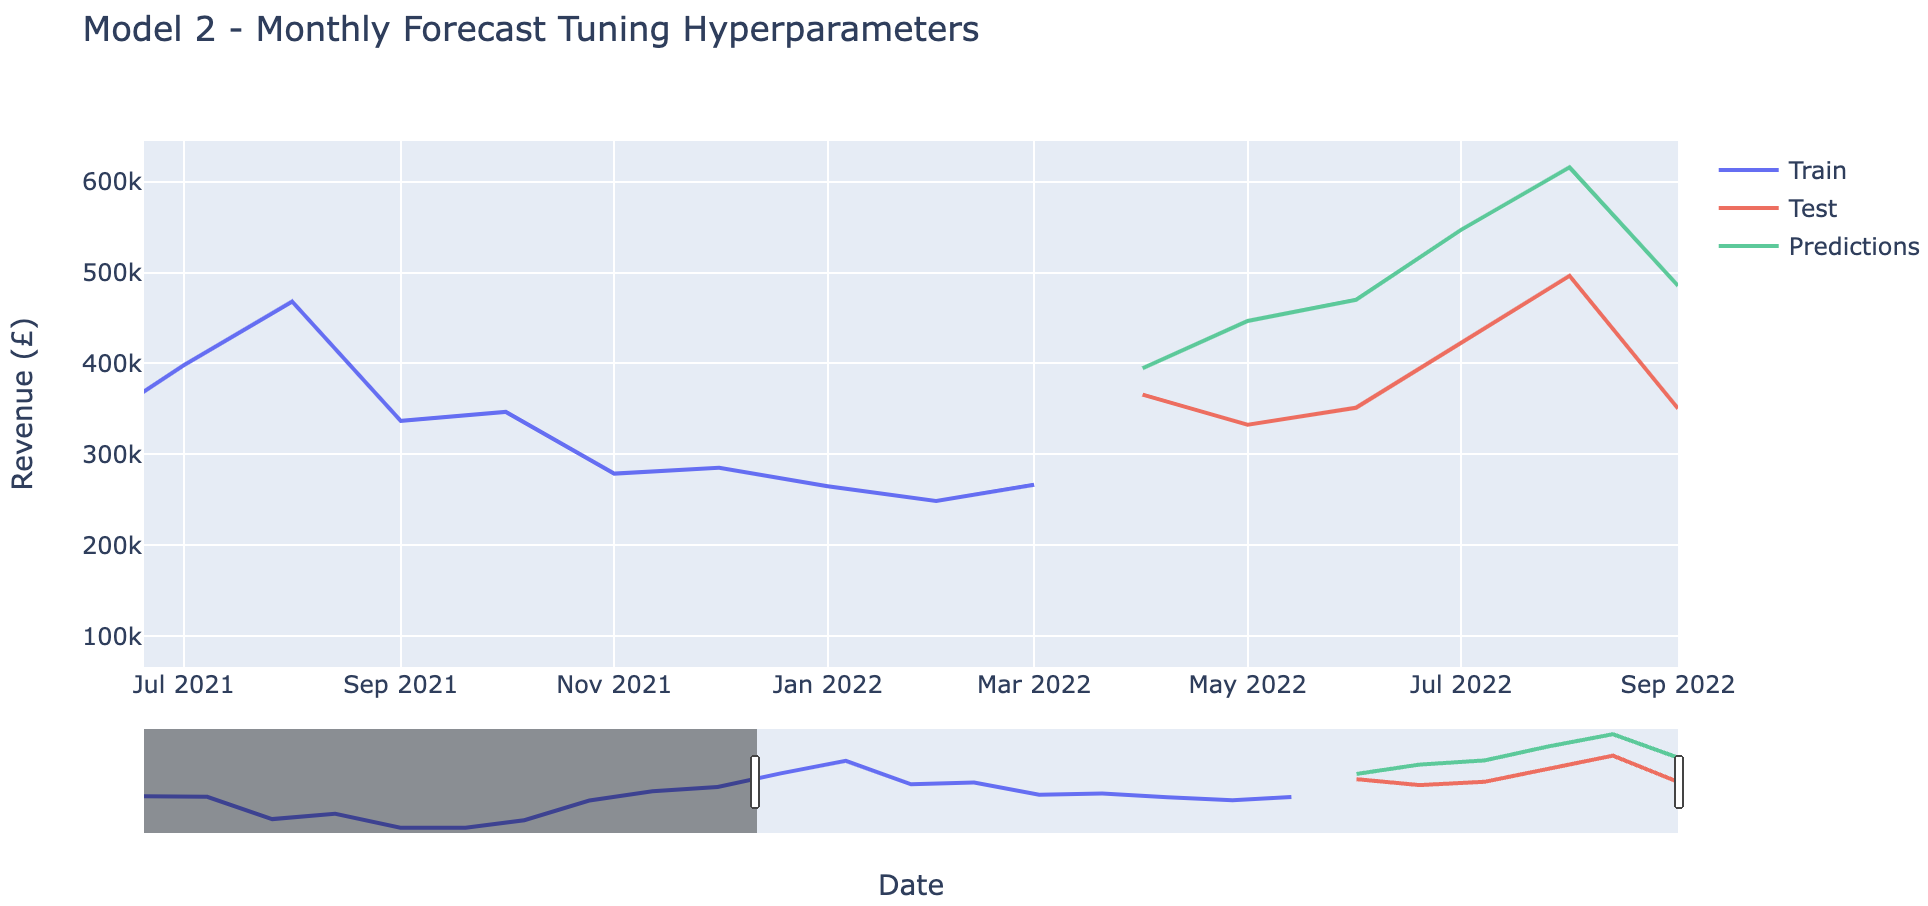


---



## Facebook Prophet Forecast Observations

The weekly forecast was almost as accurate as the current best SARIMAX model. This model appeared to account for the school holidays well. To further improve this model in the future so that is is perhaps better than the SARIMAX model, more data should be included.

The monthly forecast produced particularly poor models, even worse than the baseline moving average models. This is most likely due to the severe lack of data required for the Facebook Propehet model to work effectively and capture the true trend.

None of these models are more accurate than the previous models though, which are summarised below.

# Further Improvements
- Larger data size collected, in particular for the monthly forecast
- Re-run the monthly forecast accounting for saturation 
- Further hyperparameter tuning with different initial and periods set 
- Additional regressors explored, such as a lagged moving average as in the Linear Regression model 
- Use daily or weekly models to forecast the 6 months ahead and sum the predicted revenue to be monthly

For full analysis please refer to [Model 4 - Facebook Prophet](#./9_Model_4_Facebook_Prophet.ipynb)

# Recreating the Datasets Required for the Facebook Prophet Forecast
Again, Facebook Prophet input data does not require too much preprocessing, only to convert the columns into `ds` for date and `y` for the target revenue column. 

In [28]:
# Importing the school holiday dataset as required by the prophet model, in the correct format
holidays = pd.read_csv(working_directory+'/5_timeseries_data/school_holidays_fb.csv', index_col=1)
# Converting the index to a datetime index 
holidays.index = pd.to_datetime(holidays.index)
# Holiday dataframe is set up correctly
holidays_train = holidays.reset_index().copy()
holidays_train.rename(columns={'Date': 'ds', 'School Holiday': 'holiday'}, inplace=True)
holidays_train.head()

ds         holiday
0 2020-10-24  School Holiday
1 2020-10-25  School Holiday
2 2020-10-26  School Holiday
3 2020-10-27  School Holiday
4 2020-10-28  School Holiday

**To recreate the daily dataset**

In [29]:
# Setting up the daily forecast
# Copy of the data is taken for audit trail purposes
prophet_full_daily = total_rev_daily.reset_index().copy()
# Columns are renamed to ds and y 
prophet_full_daily.rename(columns={'index': 'ds', 'Total_Revenue': 'y'}, inplace=True)
# To drop redundant columns 
prophet_full_daily = prophet_full_daily[['ds', 'y', 'TAVG']]
# To validate it is in the correct format
prophet_full_daily.head()

ds         y  TAVG
0 2020-09-01   9780.76  24.0
1 2020-09-02  10037.55  27.0
2 2020-09-03   9419.30  31.0
3 2020-09-04  10606.15  27.0
4 2020-09-05  12922.00  23.0

In [30]:
# Test daily dataset created 
prophet_test_daily = prophet_full_daily.loc[prophet_full_daily.ds >= '2022-10-01']
prophet_test_daily = prophet_test_daily.loc[prophet_test_daily.ds <= '2022-10-07']
# To validate it is in the correct format
prophet_test_daily

ds         y  TAVG
760 2022-10-01  16254.85  25.0
761 2022-10-02  12768.89  22.0
762 2022-10-03   9407.68  22.0
763 2022-10-04   8305.30  27.0
764 2022-10-05   7659.81  28.0
765 2022-10-06   8891.92  21.0
766 2022-10-07  10692.14  24.0

**To recreate the weekly dataset**

In [31]:
prophet_full_weekly = pd.DataFrame(total_rev_weekly['Total_Revenue'].copy())
# To reset the index column
prophet_full_weekly = prophet_full_weekly.reset_index()
# Columns are renamed to ds and y 
prophet_full_weekly.rename(columns={'index': 'ds', 'Total_Revenue': 'y'}, inplace=True)
# To validate it is in the correct format
prophet_full_weekly.head()

ds         y
0 2020-09-06  62891.56
1 2020-09-13  64159.55
2 2020-09-20  65532.19
3 2020-09-27  58612.25
4 2020-10-04  52732.89

In [32]:
# Test weekly dataset created 
prophet_test_weekly = prophet_full_weekly.loc[prophet_full_weekly.ds >= '2022-10-02']
# To validate it is in the correct format
prophet_test_weekly.tail()

ds         y
108 2022-10-02  75804.92
109 2022-10-09  77423.15
110 2022-10-16  73845.07
111 2022-10-23  75097.48
112 2022-10-30  97606.92

**To recreate the monthly dataset**

In [33]:
prophet_full_monthly = pd.DataFrame(total_rev_monthly['Total_Revenue'].copy())
# To reset the index column
prophet_full_monthly = prophet_full_monthly.reset_index()
# Columns are renamed to ds and y 
prophet_full_monthly.rename(columns={'index': 'ds', 'Total_Revenue': 'y'}, inplace=True)
# To validate it is in the correct format
prophet_full_monthly.head()

ds          y
0 2020-09-01  271314.93
1 2020-10-01  267385.25
2 2020-11-01  143635.13
3 2020-12-01  173145.73
4 2021-01-01   95207.98

In [34]:
# Test monthly dataset created 
prophet_test_monthly = prophet_full_monthly.loc[prophet_full_monthly.ds >= '2022-09-01']
# To validate it is in the correct format
prophet_test_monthly.tail()

ds          y
24 2022-09-01  350491.42
25 2022-10-01  362204.28

---

# Forecasting on New Data Using the Best Models 
To confirm the accuracy of each of the models developed, they will be used to forecast another 7 days (for the daily forecast), 5 weeks (for the weekly forecast) and 2 months (for the monthly forecast) on bakery sales data for the month of October 2022. 

Of the forecasts, it is hypothesised that:
- The Daily Forecast should perform quite well, as across all the different models built, except for the baseline moving average, they achieved MAPE scores of below 10% and relatively good R<sup>2</sup> scores
- The Weekly and Monthly will perform more poorly than the achieved accuracy scores. This is hypothesised due to the lack of train data that was used to fit the model and by looking at the graphs the predicted values often fitted poorly to the true values, in particular with the Weekly forecast 

The models will be run consecutively, with the graphs plotted, accuracy scores calculated and then all be evaluated in their relevant evaluation sections. 

# Daily Forecast on New Data
The daily forecasts are expected to score accruate results due to the previous scores and large train dataset. The evaluation of each daily forecast made by the different models can be found here: [Daily Forecast Evaluation](#Daily-Forecast-Evaluation).

In [35]:
# First an empty results dataframe is created to track the accuracy of the models run
daily_model_scores = pd.DataFrame()

**Train and test datasets are created for plotting in graphs.**

In [36]:
# Full train test dataset 
train_test = ma_daily.loc[:'2022-10-07'].copy()
# A copy of the forecasted slice of the dataset is taken to plot on graphs 
train_daily = train_test.loc[:'2022-10-01'].copy()
train_daily.drop(columns=['7D_MA'],inplace=True)
# To validate it worked
train_daily.head()

Total_Revenue
2020-09-01        9780.76
2020-09-02       10037.55
2020-09-03        9419.30
2020-09-04       10606.15
2020-09-05       12922.00

In [37]:
# A copy of the forecasted slice of the dataset is taken to be able to plot in graphs 
test_daily = train_test['2022-10-01':'2022-10-07'].copy()
test_daily.drop(columns=['7D_MA'],inplace=True)
# To validate it worked 
test_daily.head()

Total_Revenue
2022-10-01       16254.85
2022-10-02       12768.89
2022-10-03        9407.68
2022-10-04        8305.30
2022-10-05        7659.81

---

# Moving Average - Daily Forecast with New Data

In [38]:
# Moving average forecast using a 7 day moving average 
bakery.predict_rev_ma(ma_daily_test, 7, 7, '7D_MA_Prediction', 'Day')

In [39]:
# A copy of the forecasted slice of the dataset is taken 
ma_predictions_daily = ma_daily_test['2022-10-01':'2022-10-07'].copy()
ma_predictions_daily

Total_Revenue     7D_MA  7D_MA_Prediction
2022-10-01       16254.85  11164.25          11164.25
2022-10-02       12768.89  11030.65          10303.42
2022-10-03        9407.68  10829.27           9749.84
2022-10-04        8305.30  10754.24           9723.68
2022-10-05        7659.81  10552.42           9724.49
2022-10-06        8891.92  10493.84           9960.86
2022-10-07       10692.14  10638.82          10258.55

In [40]:
bakery.train_forecast_plot(train_daily, test_daily, ma_predictions_daily.index,
                           ma_predictions_daily['7D_MA_Prediction'], 'Moving Average - Daily Forecast on New Data')

In [41]:
# Accuracy of the moving average 
bakery.full_accuracy_report(ma_predictions_daily['Total_Revenue'], ma_predictions_daily['7D_MA_Prediction'], 
                            'ma daily forecast')

The R2 for the ma daily forecast is: 0.277

The RMSE for the ma daily forecast is: 2381.93

The MAE between the actual and ma daily forecast revenue is 1840.55

The MAPE between the actual and ma daily forecast revenue is 16.3%


In [42]:
# To add the scores to the results table 
daily_model_scores = bakery.add_results(daily_model_scores, 1, 0.277, 2381.93, 'N/A', 
                                          '16.3%', '7 Day Moving Average')

Model     R2     RMSE  AIC MAPE (%)              Comments
0      1  0.277  2381.93  N/A    16.3%  7 Day Moving Average

---

# Linear Regression - Daily Forecast with New Data

In [43]:
# Linear regression forecast made
lr_predictions_daily = lr_daily.predict(lr_X_test_con_daily)

In [44]:
# Accuracy of the linear regression 
bakery.full_accuracy_report(ma_predictions_daily['Total_Revenue'], 
                            lr_predictions_daily[ma_predictions_daily.index], 'lr daily forecast')

The R2 for the lr daily forecast is: 0.92

The RMSE for the lr daily forecast is: 792.42

The MAE between the actual and lr daily forecast revenue is 758.01

The MAPE between the actual and lr daily forecast revenue is 7.8%


In [45]:
bakery.train_forecast_plot(train_daily, ma_predictions_daily, lr_predictions_daily.index, lr_predictions_daily,
                           'Linear Regression - Daily Forecast on New Data')

In [46]:
# To add the scores to the results table 
daily_model_scores = bakery.add_results(daily_model_scores, 2, 0.92,792.42, 'N/A', 
                                          '7.8%', 'Linear Regression')

Model     R2     RMSE  AIC MAPE (%)              Comments
0      1  0.277  2381.93  N/A    16.3%  7 Day Moving Average
1      2  0.920   792.42  N/A     7.8%     Linear Regression

---

# SARIMAX - Daily Forecast with New Data

In [47]:
# SARIMAX daily forecast 
sx_predictions_daily = sx_daily.predict(start='2022-10-01', end ='2022-10-07', exog=test_ex_d)

In [48]:
bakery.train_forecast_plot(train_daily, ma_predictions_daily, sx_predictions_daily.index ,sx_predictions_daily, 
                           'SARIMAX - Daily Forecast on New Data')

In [49]:
# SARIMAX accuracy 
bakery.full_accuracy_report(test_daily['Total_Revenue'], sx_predictions_daily, 'daily forecast')

The R2 for the daily forecast is: 0.967

The RMSE for the daily forecast is: 508.98

The MAE between the actual and daily forecast revenue is 363.61

The MAPE between the actual and daily forecast revenue is 4.1%


In [50]:
# To add the scores to the results table 
daily_model_scores = bakery.add_results(daily_model_scores, 3, 0.967, 508.98, 'N/A', 
                                          '4.1%', 'SARIMAX')

Model     R2     RMSE  AIC MAPE (%)              Comments
0      1  0.277  2381.93  N/A    16.3%  7 Day Moving Average
1      2  0.920   792.42  N/A     7.8%     Linear Regression
2      3  0.967   508.98  N/A     4.1%               SARIMAX

---

# Facebook Prophet - Daily Forecast with New Data

In [51]:
# A dataframe is created to format the test dataset requried for making predictions
prophet_test_daily = prophet_test_daily.drop(columns='y')

In [52]:
# Predict method to forecast using the fitted model 
prophet_prediction_daily = fb_daily.predict(prophet_test_daily)
prophet_prediction_daily[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat   yhat_lower    yhat_upper
2 2022-10-03   9325.118356  7224.496394  11560.062081
3 2022-10-04   8619.316705  6491.253087  10771.032882
4 2022-10-05   8747.600767  6627.361130  10870.853334
5 2022-10-06   8665.881409  6508.177116  10816.826792
6 2022-10-07  10777.132723  8720.563754  13029.353974

In [53]:
bakery.train_forecast_plot(train_daily,test_daily, prophet_prediction_daily['ds'],
                           prophet_prediction_daily['yhat'], 'Facebook Prophet - Daily Forecast on New Data')

In [54]:
# Accuracy 
bakery.full_accuracy_report(test_daily['Total_Revenue'], prophet_prediction_daily['yhat'], 'fb daily forecast')

The R2 for the fb daily forecast is: 0.82

The RMSE for the fb daily forecast is: 1187.39

The MAE between the actual and fb daily forecast revenue is 824.17

The MAPE between the actual and fb daily forecast revenue is 7.0%


In [55]:
# To add the scores to the results table 
daily_model_scores = bakery.add_results(daily_model_scores, 4, 0.82, 1187.39, 'N/A', 
                                          '7.0%', 'Prophet')

Model     R2     RMSE  AIC MAPE (%)              Comments
0      1  0.277  2381.93  N/A    16.3%  7 Day Moving Average
1      2  0.920   792.42  N/A     7.8%     Linear Regression
2      3  0.967   508.98  N/A     4.1%               SARIMAX
3      4  0.820  1187.39  N/A     7.0%               Prophet

# Daily Forecast Evaluation

A summary of the new predicted accuracy scores can be found below: 

|Model| R<sup>2</sup> | RMSE  | MAPE |
|:--| :- | :- | :- | 
|Moving Average|0.277| 2381.93	|  16.3 %| 
|Linear Regression |0.920| 792.42|  7.8 %|
|SARIMAX |0.967|508.98|4.1 % |
|Facebook Prophet |0.820|1187.39|7.0 %|

The comparison of the the new and previous MAPE scores for each model are sumamrised below: 

|MAPE Score| Moving Average | Linear Regression | SARIMAX| Facebook Prophet|
|:--| :- | :- | :--|:--|
|Orignal Daily Forecast |20.7 %| 7.7 %|  5.9 % | 9.5 %|
|New Daily Forecast |16.3 %| 7.8 %|  4.1 %| 7.0 %|

All the models tested produced MAPE scores better or similar to the orginal test dataset, suggesting they are accurate in real world situations and not overfitted to the original train dataset. 

The moving average model produced the highest MAPE score and a poor R<sup>2</sup> score. As with the original test set, this is due to it using predicted values in the forecast calculation, which leads to a smoothing effect and missing key fluctuations in the data. This model is therefore not suitable and will not be taken forward past this project. 

The Linear Regression produced similar accuracy scores to the original test dataset. This suggests that it is a reliable model and should continue to predict daily revenue at that accuracy. 

The SARIMAX model produced even better accuracy scores than the original test scores, achieving the lowest MAPE score of any of the models on any of the forecast lengths. This is therefore deemed the most accurate daily forecasting model. 

The Facebook Prophet also produced accuracy scores lower than the original test dataset, improving the original MAPE score by 2.5%. 

Based on the above results, the SARIMAX is the best model, with Facebook Prophet and Linear Regression a close second. Going forward, the SARIMAX model will be recommended to the business to support daily revenue forecasting. 

---

# Weekly Forecast on New Data
The weekly forecasts are expected to score relatively ok, but worse than the orginal test accuracy scores and worse than the daily forecasts due to the lack of train dataset the models were fitted on. 

The evaluation of each weekly forecast made by the different models can be found here: [Weekly Forecast Evaluation](#Weekly-Forecast-Evaluation).

In [56]:
# First an empty results dataframe is created to track the accuracy of the models run
weekly_model_scores = pd.DataFrame()

In [57]:
# Train test split created for graph plotting 
train_weekly = total_rev_weekly.loc[:'2022-10-02'].copy()
test_weekly = total_rev_weekly.loc['2022-10-02':'2022-10-30'].copy()

---

# Moving Average - Weekly Forecast with New Data

In [58]:
# Moving average forecast using a 20 week moving average
bakery.predict_rev_ma(ma_weekly, 20, 5, '20W_MA_Prediction', 'Week')

In [59]:
# A copy of the forecasted slice of the dataset is taken 
ma_predictions_weekly = ma_weekly['2022-10-02':'2022-10-30'].copy()
ma_predictions_weekly

Total_Revenue    20W_MA  20W_MA_Prediction
2022-10-02       75804.92  90752.88           90752.88
2022-10-09       77423.15  90962.82           91710.22
2022-10-16       73845.07  91518.56           92980.31
2022-10-23       75097.48  91485.91           93904.42
2022-10-30       97606.92  89463.00           92821.86

In [60]:
bakery.train_forecast_plot(train_weekly, test_weekly, ma_predictions_weekly.index,
                           ma_predictions_weekly['20W_MA_Prediction'], 'Moving Average - Weekly Forecast on New Data')

In [61]:
# Accuracy of the moving average 
bakery.full_accuracy_report(test_weekly['Total_Revenue'], ma_predictions_weekly['20W_MA_Prediction'], 
                            'ma weekly forecast')

The R2 for the ma weekly forecast is: -1.954

The RMSE for the ma weekly forecast is: 15299.13

The MAE between the actual and ma weekly forecast revenue is 14392.45

The MAPE between the actual and ma weekly forecast revenue is 18.8%


In [62]:
# To add the scores to the results table 
weekly_model_scores = bakery.add_results(weekly_model_scores, 1, -1.954, 15299.13, 'N/A', 
                                          '18.8%', '20 Week Moving Average')

Model     R2      RMSE  AIC MAPE (%)                Comments
0      1 -1.954  15299.13  N/A    18.8%  20 Week Moving Average

---

# Linear Regression - Weekly Forecast with New Data

In [63]:
# Linear regression 4 week forecast made
lr_predictions_weekly = lr_weekly.predict(lr_X_test_con_weekly)

In [64]:
bakery.train_forecast_plot(train_weekly, test_weekly, lr_predictions_weekly.index, lr_predictions_weekly,
                           'Linear Regression - Weekly Forecast on New Data')

In [65]:
# Accuracy of the linear regression 
bakery.full_accuracy_report(test_weekly['Total_Revenue'], lr_predictions_weekly, 
                            'lr weekly forecast')

The R2 for the lr weekly forecast is: 0.132

The RMSE for the lr weekly forecast is: 8295.02

The MAE between the actual and lr weekly forecast revenue is 8095.29

The MAPE between the actual and lr weekly forecast revenue is 10.2%


In [66]:
# To add the scores to the results table 
weekly_model_scores = bakery.add_results(weekly_model_scores, 2, 0.132, 8295.02, 'N/A', 
                                          '10.2%', 'Linear Regression')

Model     R2      RMSE  AIC MAPE (%)                Comments
0      1 -1.954  15299.13  N/A    18.8%  20 Week Moving Average
1      2  0.132   8295.02  N/A    10.2%       Linear Regression

---

# SARIMAX - Weekly Forecast with New Data

In [67]:
# SARIMAX weekly forecast 
sx_predictions_weekly = sx_weekly.predict(start='2022-10-02', end ='2022-10-30', exog=test_ex_w)

In [68]:
bakery.train_forecast_plot(train_weekly, test_weekly, sx_predictions_weekly.index ,sx_predictions_weekly, 
                           'SARIMAX - Weekly Forecast on New Data')

In [69]:
# Accuracy of the sarimax weekly
bakery.full_accuracy_report(test_weekly['Total_Revenue'], sx_predictions_weekly, 
                            'sarimax weekly forecast')

The R2 for the sarimax weekly forecast is: -22.638

The RMSE for the sarimax weekly forecast is: 43276.39

The MAE between the actual and sarimax weekly forecast revenue is 39080.03

The MAPE between the actual and sarimax weekly forecast revenue is 51.6%


In [70]:
# To add the scores to the results table 
weekly_model_scores = bakery.add_results(weekly_model_scores, 3, -22.638, 43276.39, 'N/A', 
                                          '51.6%', 'SARIMAX')

Model      R2      RMSE  AIC MAPE (%)                Comments
0      1  -1.954  15299.13  N/A    18.8%  20 Week Moving Average
1      2   0.132   8295.02  N/A    10.2%       Linear Regression
2      3 -22.638  43276.39  N/A    51.6%                 SARIMAX

---

# Facebook Prophet - Weekly Forecast with New Data

In [71]:
# A dataframe is created to format the test dataset requried for making predictions
prophet_test_weekly = prophet_test_weekly.drop(columns='y')

In [72]:
# Predict method to forecast using the fitted model 
prophet_prediction_weekly = fb_weekly.predict(prophet_test_weekly)
prophet_prediction_weekly[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds           yhat    yhat_lower     yhat_upper
0 2022-10-02   87926.397623  68782.082447  108383.228878
1 2022-10-09   87730.349641  67095.314861  108540.202819
2 2022-10-16   88563.621671  68624.224090  109495.327960
3 2022-10-23  102915.044156  83214.223693  123063.165723
4 2022-10-30  103213.858608  81290.237107  123145.838048

In [73]:
bakery.train_forecast_plot(train_weekly,test_weekly, prophet_prediction_weekly['ds'],
                           prophet_prediction_weekly['yhat'], 'Facebook Prophet - Weekly Forecast on New Data')

In [74]:
# Accuracy of the prophet weekly
bakery.full_accuracy_report(test_weekly['Total_Revenue'], prophet_prediction_weekly['yhat'], 
                            'prophet weekly forecast')

The R2 for the prophet weekly forecast is: -2.219

The RMSE for the prophet weekly forecast is: 15969.09

The MAE between the actual and prophet weekly forecast revenue is 14114.35

The MAPE between the actual and prophet weekly forecast revenue is 18.4%


In [75]:
# To add the scores to the results table 
weekly_model_scores = bakery.add_results(weekly_model_scores, 4, -2.219, 15969.09, 'N/A', 
                                          '18.4%', 'Facebook Prophet')

Model      R2      RMSE  AIC MAPE (%)                Comments
0      1  -1.954  15299.13  N/A    18.8%  20 Week Moving Average
1      2   0.132   8295.02  N/A    10.2%       Linear Regression
2      3 -22.638  43276.39  N/A    51.6%                 SARIMAX
3      4  -2.219  15969.09  N/A    18.4%        Facebook Prophet

# Weekly Forecast Evaluation

A summary of the new predicted accuracy scores for the weekly forecasts can be found below: 

|Model| R<sup>2</sup> | RMSE  | MAPE |
|:--| :- | :- | :- | 
|Moving Average|-1.954| 15299.13	|  18.8 %| 
|Linear Regression |0.132| 8295.02|  10.2 %|
|SARIMAX |-22.638|43276.39|51.6 % |
|Facebook Prophet |-2.21915969.09|18.4 %|

The comparison of the the new and previous MAPE scores for each model are sumamrised below: 

|MAPE Score| Moving Average | Linear Regression | SARIMAX| Facebook Prophet|
|:--| :- | :- | :--|:--|
|Original Weekly Forecast |24.8 %| 9.9 %| 8.2 %| 8.5 % | 
|New Weekly Forecast |18.8 %| 10.2 %|  51.6 %| 18.4 %|

Nearly all the models run produced worse MAPE scores than the orginal test dataset, in particular the SARIMAX model, which originally was deemed the best model performed the atrociously, achieving a MAPE score of 51.6%. This suggests that the model is inaccurate and should not be taken forward or recommended to the business for application. As mentioned in the SARIMAX summary, the residuals from the weekly SARIMAX model were slightly heteroscedastic and showed some variance. This suggests that the model was not fitted well to the train data, and would be inaccurate. 

The Linear Regression model produced similar MAPE score to the original test score, and the only model to produce a positive R<sup>2</sup> value. As with the daily forecast, this suggests that the Linear Regression model is realtively reliable and consistent in forecasting. It also produced the best accuracy scores out of all the models re-tested. 

The Facebook Prophet model produced worse scores, and looking at the graph predicted the revenue to be greater than it was. It did however capture the correct trend shape. As mentioned in the Facebook Prophet Summary Notebook and EDA, the growth in 2020-2021 was far greater than 2021-2022. It appears that the Facebook Prophet is capturing and forecasting revenue based on the original growth rate. To improve this, the model should be re-evaluated and tested with the 'growth' hyperparameter being tuned. 

Based on the above results, the Linear Regression is the best and most reliable model for weekly forecast. Therefore, this iwll be recommended to the business to support weekly revenue forecasting. Facebook Prophet model will also be re-assessed with the 'growth' parameter explored. 


---

# Monthly Forecast on New Data
The monthly forecasts are expected to score worse than the orginal test accuracy scores and worse than the daily forecasts due to the lack of train dataset the models were fitted on. 

The evaluation of each monthly forecast made by the different models can be found here: [Monthly Forecast Evaluation](#Monthly-Forecast-Evaluation).

In [76]:
# First an empty results dataframe is created to track the accuracy of the models run
monthly_model_scores = pd.DataFrame()

In [77]:
# Train test split created for graph plotting 
train_monthly = total_rev_monthly.loc[:'2022-08-01'].copy()
test_monthly = total_rev_monthly.loc['2022-09-01':].copy()


# Moving Average - Monthly Forecast with New Data

In [78]:
# Moving average forecast using a 12 month moving average 
bakery.predict_rev_ma(ma_monthly, 12, 2, '12M_MA_Prediction', 'Month')

In [79]:
# A copy of the forecasted slice of the dataset is taken, this forms a series that needs to be converted to dataframe
ma_predictions_monthly = ma_monthly.loc['2022-09-01':].copy()
ma_predictions_monthly

Total_Revenue     12M_MA  12M_MA_Prediction
2022-09-01      350491.42  333126.15          333126.15
2022-10-01      362204.28  334256.18          332809.07

In [80]:
bakery.train_forecast_plot(train_monthly, test_monthly, ma_predictions_monthly.index,
                           ma_predictions_monthly['12M_MA_Prediction'], 
                           'Moving Average - Monthly Forecast on New Data')

In [81]:
# Accuracy of the moving average 
bakery.full_accuracy_report(test_monthly['Total_Revenue'], ma_predictions_monthly['12M_MA_Prediction'], 
                            'ma monthly forecast')

The R2 for the ma monthly forecast is: -15.993

The RMSE for the ma monthly forecast is: 24141.57

The MAE between the actual and ma monthly forecast revenue is 23380.24

The MAPE between the actual and ma monthly forecast revenue is 6.5%


In [82]:
# To add the scores to the results table 
monthly_model_scores = bakery.add_results(monthly_model_scores, 1, 15.993, 24141.57, 'N/A', 
                                          '6.5%', '12 Month Moving Average')

Model      R2      RMSE  AIC MAPE (%)                 Comments
0      1  15.993  24141.57  N/A     6.5%  12 Month Moving Average

---

# Linear Regression - Monthly Forecast with New Data

In [83]:
# Linear regression forecast made for 2 months 
lr_predictions_monthly = lr_monthly.predict(lr_X_test_con_monthly)

In [84]:
bakery.train_forecast_plot(train_monthly, test_monthly, lr_predictions_monthly.index, lr_predictions_monthly,
                           'Linear Regression - Monthly Forecast on New Data')

In [85]:
# Accuracy of the linear regression 
bakery.full_accuracy_report(test_monthly['Total_Revenue'], lr_predictions_monthly, 
                            'lr monthly forecast')

The R2 for the lr monthly forecast is: -158.023

The RMSE for the lr monthly forecast is: 73852.1

The MAE between the actual and lr monthly forecast revenue is 57864.01

The MAPE between the actual and lr monthly forecast revenue is 16.5%


In [86]:
# To add the scores to the results table 
monthly_model_scores = bakery.add_results(monthly_model_scores, 2, -158.023, 73852.1, 'N/A', 
                                          '16.5%', 'Linear Regression')

Model       R2      RMSE  AIC MAPE (%)                 Comments
0      1   15.993  24141.57  N/A     6.5%  12 Month Moving Average
1      2 -158.023  73852.10  N/A    16.5%        Linear Regression

---

# SARIMAX - Monthly Forecast with New Data

In [87]:
# SARIMAX monthly forecast 
sx_predictions_monthly = sx_monthly.predict(start='2022-09-01', end ='2022-10-01', exog=test_ex_m)

In [88]:
bakery.train_forecast_plot(train_monthly, test_monthly, sx_predictions_monthly.index ,sx_predictions_monthly, 
                           'SARIMAX - Monthly Forecast on New Data')

In [89]:
# Accuracy of the linear regression 
bakery.full_accuracy_report(test_monthly['Total_Revenue'], sx_predictions_monthly, 
                            'SARIMAX monthly forecast')

The R2 for the SARIMAX monthly forecast is: -77.127

The RMSE for the SARIMAX monthly forecast is: 51764.57

The MAE between the actual and SARIMAX monthly forecast revenue is 47690.82

The MAPE between the actual and SARIMAX monthly forecast revenue is 13.5%


In [90]:
# To add the scores to the results table 
monthly_model_scores = bakery.add_results(monthly_model_scores, 3, -77.127, 51764.57, 'N/A', 
                                          '13.5%', 'SARIMAX')

Model       R2      RMSE  AIC MAPE (%)                 Comments
0      1   15.993  24141.57  N/A     6.5%  12 Month Moving Average
1      2 -158.023  73852.10  N/A    16.5%        Linear Regression
2      3  -77.127  51764.57  N/A    13.5%                  SARIMAX

---

# Facebook Prophet - Monthly Forecast with New Data

In [91]:
# A dataframe is created to format the test dataset requried for making predictions
p_test_monthly = prophet_test_monthly.drop(columns='y')

In [92]:
# Predict method to forecast using the fitted model 
prophet_prediction_monthly = fb_monthly.predict(p_test_monthly)
prophet_prediction_monthly[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds           yhat     yhat_lower     yhat_upper
0 2022-09-01  485440.084729  467276.302554  503651.879066
1 2022-10-01  496562.912611  474629.065505  519799.227325

In [93]:
# To plot the forecast vs actual 
bakery.train_forecast_plot(train_monthly, test_monthly, prophet_prediction_monthly['ds'],
                           prophet_prediction_monthly['yhat'], 'Facebook Prophet - Monthly Forecast on New Data')

In [94]:
# Accuracy of the linear regression 
bakery.full_accuracy_report(test_monthly['Total_Revenue'], prophet_prediction_monthly['yhat'], 
                            'prophet monthly forecast')

The R2 for the prophet monthly forecast is: -527.655

The RMSE for the prophet monthly forecast is: 134653.97

The MAE between the actual and prophet monthly forecast revenue is 134653.65

The MAPE between the actual and prophet monthly forecast revenue is 37.8%


In [95]:
# To add the scores to the results table 
monthly_model_scores = bakery.add_results(monthly_model_scores, 4, -527.655, 134653.97, 'N/A', 
                                          '37.8%', 'Facebook Prophet')

Model       R2       RMSE  AIC MAPE (%)                 Comments
0      1   15.993   24141.57  N/A     6.5%  12 Month Moving Average
1      2 -158.023   73852.10  N/A    16.5%        Linear Regression
2      3  -77.127   51764.57  N/A    13.5%                  SARIMAX
3      4 -527.655  134653.97  N/A    37.8%         Facebook Prophet

---

# Monthly Forecast Evaluation

A summary of the new predicted accuracy scores for the monthly forecasts can be found below: 

|Model| R<sup>2</sup> | RMSE  | MAPE |
|:--| :- | :- | :- | 
|Moving Average|15.993	| 24141.57	|  6.5 %| 
|Linear Regression |-158.023| 73852.10|  16.5 %|
|SARIMAX |-77.127|51764.57|13.5 % |
|Facebook Prophet |-527.655 | 134653.97|37.8 %|

The comparison of the the new and previous MAPE scores for each model are sumamrised below: 

|MAPE Score| Moving Average | Linear Regression | SARIMAX| Facebook Prophet|
|:--| :- | :- | :--|:--|
|Original Monthly Forecast |17.0 %|13.3 %| 7.1 %| 28.0 %|
|New Monthly Forecast |6.5 %| 16.5 %|  13.5 %| 37.8 %|

Looking at the above MAPE scores, again the Linear Regression produced the most reliable results, achieving similar accuracy scores compared to the original test case. 

The SARIMAX model performed relatively well and better than the weekly SARIMAX model. This suggest that perhaps it's not only the lack data points as to why the weekly SARIMAX model performed so poorly and rather the feature engineering and hyperparameters chosen. For both the daily and monthly SARIMAX models they had more holiday columns and a p parameter greater than 0. 

The Facbeook Prophet model performed particularly poorly and worse than the test score. Again this is likely due to the lack of data points used to fit the model, less than 20. In addition to this, the Prophet model over-forecasted the revenue, again highlighting the need to explore the 'growth' hyperparameter. 

The Moving Average model actually produced the most accurate MAPE score of 6.5%. However, it is not deemed the most accurate forecast, as it just continues the last trend which happened to conincide with the true new data. 

Therefore, going forward the SARIMAX will be recommended for the monthly forecast, with Linear Regression as a close second. The Facebook Prophet model requires further exploration and parameter to see if it can improve. 

# Final Modelling Summary

**The different length forecasts summary:**

- The daily forecast models were the most accurate out of all forecasts both on the original and new test data. This is most likely due to train data size that the models were fitted on. The daily forecast models were trained on c.750 data points, unlike the weekly on c.100 versus only 20 data points for the monthly forecast.


- The weekly forecast models originally produced relatively accurate models, however in the new test data performed quite poorly, except for the Linear Regression model which produced similar scores. This suggests that more work is required to improve these models. 


- Monthly forecast models produced the least accurate results, however the Linear Regression and SARIMAX were both consistent between the original and new test data. To further improve the monthly forecast model, more data is required. Most timeseries models require at least 50 if not 100 observations in order to build an accurate model. For this project it was decided to use only 2 years worth of data (c .20 data points for monthly revenue) due to the Covid Pandemic, which according to the owner has completely changed the trend of the sales. Therefore, it was deemed that including data pre-pandemic may produce inaccurate models as the trends are no longer the same. 

**The different models built summary:**

- The SARIMAX model tended to produce the more accurate forecasts, in particular for daily and monthly, both on the original and new test dataset. This suggests that SARIMAX is a suitable timeseries model to use for forecasting the bakery revenue. The weekly SARIMAX forecast performed terribly. This was originally thought to be due to the lack of train data points, however as the monthly SARIMAX model performed relatively ok and similarly to the original test dataset that was ruled out. It is therefore more likely due to selected features and hyperparameter tuning. The daily and monthly SARIMAX models both included more holiday columns and had p parameters (which determine the autoregressive component of the model) greater than 0. This is most likely the cause of the inaccurate predictions as the autoregressive part of SARIMAX predicts future values based on past revenue values. 


- The Facebook Prophet model produced less accurate models that originally thought before building them. However, upon inspection it appears that all the models correctly determined the trend and shape of the predicted values, it just over-predicted the revenue amount. This is thought to be due to it forecasting based on the growth from 2020-2021, which was far greater than 2021-2022. Therefore, if this were to be explored going forward, the 'growth' hyperparameter should be tuned to see if this improves results. 


- The Linear Regression model produced the most reliable results, achieving similar accuracy scores for daily, weekly and monthly forecasts across the original and new test data. This suggests that if deployed in the bakery it would produce similar results. 

# Recommendations and Next Steps
**Recommendations**: 
- The SARIMAX model will be recommended to forecast the daily revenue as it produced the most accurate results on both the original and the new test data and is accurate enough to be useful for the business, that specified in their problem statement a minimum of 95% accuracy is required. It is also the easiest to implement as the data does not require too much preprocessing, unlike the Linear Regression and Facebook Prophet. 

- Unfortunately, the weekly and monthly models aren't deemed reliable enough or accurate enough to be recommended and implemented in the business yet. For the monthly forecasts, an accuracy of 92-95% is required and for the weekly 95% is required. 
- The Linear Regression model is the closest to being accurate to forecast the weekly revenue as it produced the most accurate and consistent results. However, it is not quite accurate enough to be useful for the business, as it only has a MAPE score of 10% (equivalent to 90% accuracy). Therefore, in the next steps the weekly forecast models will be reviewed first in an attempt to improve them. 


**Next Steps:**

To further try and improve the models, a second round of modelling should be implemented, including:
- Collect more historical data, at least 4 years worth of data, to train the weekly and monthly forecast models on to see if this improves results
- Include a 'Pandemic' feature for the new data to account for the Pandemic change in behaviour during and between the lockdowns 
- Review the SARIMAX weekly model and increasing the p parameter and number of features included 
- Explore the 'growth' parameter in Facebook Prophet
- Explore ensemble timeseries modelling such as XGBoost to see if this improves results 
- If the weekly and monthly models cannot achieve the accuracy required work arounds will be explored, such as using daily data, which has more data points, to forecast the required lengths 
- Once models are selected for each forecast that are to be implemented in the buesiness, build a script to easily convert data into correct format for the selected forecast models, which would have been completed in this phase if there was more time
- Build an API for the finalised models so the business access forecasts as and when they are required 
- Build a revenue and product sale dashboard for the business to support day to day activities and monitoring to see if the business is achieving the forecasts or not in real-time and easily 

# Things I've Learnt
Throughout this project I've had the opportunity to develop and strengthen:
- Exploratory Data Analysis skills, and learnt to not take everything at face value but to delve deeper into the data
- Timeseries analysis, in particular SARIMAX and Facebook Prophet skills
- Strengthened my function writing ability, in particular writing functions that are fit for purpose for multiple scenarios, as with my plotting functions 
- Solidified the necessity of a thouroughly thought out and researched problem statement
- Learnt the importance of writing docstrings as the functions are being developed 

# References 
[1] - **Prophet: forecasting at scale**, Meta Research, https://research.facebook.com/blog/2017/2/prophet-forecasting-at-scale/

>[Return to Contents](#Contents)